In [128]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')


from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute  import SimpleImputer
from sklearn.neighbors  import KNeighborsRegressor
from sklearn.preprocessing import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [129]:
#Loading the dataset
ca = pd.read_csv("C:/Users/DELL/Downloads/adverts (1).csv")

In [130]:
#examine the data
ca.head(5)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [131]:
ca.shape

(402005, 12)

# Exploratory Data Analysis

In [132]:
rows_with_null_year = ca[(ca['reg_code'].notnull()) & (ca['year_of_registration'].isnull())]

print(rows_with_null_year)


        public_reference  mileage reg_code standard_colour standard_make  \
54       202007030806426  30000.0       18             Red      Vauxhall   
83       202008222801747  42847.0       61             Red         Honda   
865      202010084741550  43130.0       66           White    Land Rover   
968      202010305607535  63369.0       17            Blue         SKODA   
1256     202010225294466  18715.0       68           White         Volvo   
...                  ...      ...      ...             ...           ...   
400336   202010315635977  66287.0       63            Blue      Vauxhall   
400725   202008252905656     45.0       20          Silver    Land Rover   
401314   202010315635541  12522.0       67             Red         Dacia   
401323   201909222504136  46000.0       13            Grey    Volkswagen   
401357   202007111114611     10.0       20            Blue      Vauxhall   

            standard_model vehicle_condition  year_of_registration  price  \
54        

In [133]:
rows_with_null_year['reg_code'].unique()

array(['18', '61', '66', '17', '68', '70', '55', '67', '65', '69', '62',
       '20', '15', '56', '94', 'B', '14', '16', 'P', '19', '64', '59',
       '60', 'E', '85', '63', 'R', '12', '51', '13', '54', '09', '10',
       'L', '04', '11', '08', '07', '06', '57', 'CA', '58', 'C', 'Y',
       '05', 'M', 'J', 'H', 'S', '03', '723xuu', '95', '52', 'N', 'F',
       'T', 'V', '02', '53', '38', 'G', 'D', 'A', '37'], dtype=object)

In [134]:
rows_with_null_year.isna().sum()

public_reference            0
mileage                     7
reg_code                    0
standard_colour            66
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration     1741
price                       0
body_type                 234
crossover_car_and_van       0
fuel_type                 128
dtype: int64

In [135]:
rows_with_null_year.loc[rows_with_null_year['reg_code'] == '723xuu']

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
166035,202010195172029,4050.0,723xuu,Turquoise,Chevrolet,Corvette,USED,NaN,89990,NaN,False,Petrol


In [136]:
ca.loc[ca['year_of_registration']==2020]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
76,202008152524052,4290.0,20,Blue,Volkswagen,Golf,USED,2020.0,28190,Hatchback,False,Petrol
84,202008242869411,3000.0,20,Red,Volvo,XC40,USED,2020.0,29895,SUV,False,Petrol
89,202008272982414,1983.0,20,Grey,Volkswagen,T-Roc,USED,2020.0,23000,SUV,False,Diesel
101,202009033246876,4000.0,70,Black,Mercedes-Benz,GLB Class,USED,2020.0,42980,SUV,False,Diesel
110,202009093500509,663.0,70,White,SEAT,Tarraco,USED,2020.0,27490,SUV,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
401865,202010054614414,3653.0,69,Grey,SKODA,Superb,USED,2020.0,27495,Hatchback,False,Petrol Plug-in Hybrid
401874,202010074693632,8.0,70,White,Renault,Captur,USED,2020.0,19000,SUV,False,Petrol
401900,202010134932433,2034.0,20,Red,Volkswagen,T-Roc,USED,2020.0,23800,SUV,False,Petrol
401930,202010195177111,7456.0,69,Blue,Nissan,Qashqai,USED,2020.0,16999,SUV,False,Petrol


In [137]:
ca.loc[ca['year_of_registration']<1950]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
28925,202006140121316,26000.0,NaN,Black,Austin,Seven,USED,1933.0,9995,Saloon,False,Petrol
59010,202006270588110,14000.0,07,Blue,Toyota,Prius,USED,1007.0,7000,Hatchback,False,Petrol Hybrid
69516,202010155035879,96659.0,65,Black,Audi,A4 Avant,USED,1515.0,10385,Estate,False,Diesel
84501,202009163810376,37771.0,63,Black,Smart,fortwo,USED,1063.0,4785,Coupe,False,Petrol
114737,202008102305925,30000.0,59,Red,Toyota,AYGO,USED,1009.0,4695,Hatchback,False,Petrol
120858,202010064654489,27200.0,66,Black,MINI,Clubman,USED,1016.0,18990,Estate,False,Diesel
148003,202010104836987,31172.0,09,Black,Hyundai,i10,USED,1909.0,3950,Hatchback,False,Petrol
150850,202006220401450,12345.0,NaN,Black,Austin,Twelve,USED,1933.0,11990,Saloon,False,Petrol
156562,202009264242828,48000.0,FW,Black,Morris,10,USED,1934.0,5995,Saloon,False,Petrol
190556,202010205206488,58470.0,10,Black,Fiat,Punto Evo,USED,1010.0,3785,Hatchback,False,Petrol


In [138]:
import pandas as pd

# Assuming your DataFrame is named 'auto_trader_data'
# Replace 'reg_code' and 'year_of_registration' with actual column names in your DataFrame
# Replace 'auto_trader_data' with the actual name of your DataFrame if different

# Create a dictionary to map reg_code values to corresponding years
reg_code_to_year = {
   'CA': 1983,
    'A': 1983,
    'B': 1984, 
    'C': 1985,
    'D': 1986,
    'E': 1987,
    'F': 1988,
    'G': 1989,
    'H': 1990,
    'J': 1991,
    'K': 1992,
    'L': 1993,
    'M': 1994,
    'N': 1995,
    'P': 1996,
    'R': 1997,
    'S': 1998,
    'T': 1999,
    'V': 1999,
    'W': 2000,
    'X': 2000,
    'Y': 2001
     # Add more mappings as needed
}

# Fill year_of_registration based on reg_code
ca['year_of_registration'] = ca.apply(lambda row: reg_code_to_year[row['reg_code']]
                                                                   if pd.isnull(row['year_of_registration'])
                                                                   and row['reg_code'] in reg_code_to_year
                                                                   else row['year_of_registration'], axis=1)



In [139]:
ca.isna().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33262
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [140]:
import re
# Define a function to extract the integer part from alphanumeric strings
def extract_integer(reg_code):
    if isinstance(reg_code, str):
        match = re.search(r'\d+', reg_code)  # Regular expression to find integers
        if match:
            return int(match.group())  # Extract and return the integer part as an integer
        else:
            return None  # Return None if no integers found
    elif isinstance(reg_code, int):
        return reg_code  # If reg_code is already an integer, return it as is
    return None
# Apply the function to extract integers from 'reg_code' column
ca['reg_code'] = ca['reg_code'].apply(extract_integer)
# Define a function to fill year_of_registration based on reg_code
def fill_year(row):
    reg_code = row['reg_code']
    if pd.isnull(row['year_of_registration']) and reg_code is not None:
        if reg_code < 50:
            return reg_code + 2000
        else:
            return reg_code - 50 + 2000  # Assuming the reg_code represents the last two digits of the year
    else:
        return row['year_of_registration']

# Apply the function to each row of the DataFrame
ca['year_of_registration'] = ca.apply(fill_year, axis=1)


In [141]:
ca.isna().sum()

public_reference             0
mileage                    127
reg_code                 34771
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     31570
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [142]:
ca.loc[ca['standard_model'] == 'Corvette']

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
13987,202010255422279,44000.0,NaN,Red,Chevrolet,Corvette,USED,2019.0,25995,Convertible,False,Petrol
23828,202010155034567,1700.0,19.0,Black,Chevrolet,Corvette,USED,2019.0,69995,Convertible,False,Petrol
27350,202009153768549,67648.0,NaN,Red,Chevrolet,Corvette,USED,2018.0,51995,Coupe,False,Petrol
76692,202005159332997,112000.0,NaN,Red,Chevrolet,Corvette,USED,1973.0,25000,NaN,False,Petrol
123786,202008122410715,88000.0,NaN,White,Chevrolet,Corvette,USED,2019.0,10000,Coupe,False,Petrol
135685,201911094186656,11100.0,17.0,Purple,Chevrolet,Corvette,USED,2017.0,79995,Convertible,False,Petrol
166035,202010195172029,4050.0,723.0,Turquoise,Chevrolet,Corvette,USED,2673.0,89990,NaN,False,Petrol
169264,202008132418639,30.0,20.0,Red,Chevrolet,Corvette,USED,2020.0,132000,NaN,False,Petrol
176415,202010145010421,92020.0,NaN,Red,Chevrolet,Corvette,USED,1999.0,9000,Convertible,False,Petrol
254508,202007251680619,5000.0,58.0,Blue,Chevrolet,Corvette,USED,2009.0,74999,Coupe,False,Petrol


In [143]:
# Assuming you want to replace the 'year_of_registration' only where 'public_reference' equals some value
ca.loc[ca['year_of_registration'] == 2673, 'year_of_registration']=1956

In [144]:
# Assuming you want to replace the 'year_of_registration' only where 'public_reference' equals some value
ca.loc[ca['year_of_registration'] == 1909, 'year_of_registration']=2009

In [145]:
ca.loc[ca['standard_model'] == 'Corvette']

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
13987,202010255422279,44000.0,NaN,Red,Chevrolet,Corvette,USED,2019.0,25995,Convertible,False,Petrol
23828,202010155034567,1700.0,19.0,Black,Chevrolet,Corvette,USED,2019.0,69995,Convertible,False,Petrol
27350,202009153768549,67648.0,NaN,Red,Chevrolet,Corvette,USED,2018.0,51995,Coupe,False,Petrol
76692,202005159332997,112000.0,NaN,Red,Chevrolet,Corvette,USED,1973.0,25000,NaN,False,Petrol
123786,202008122410715,88000.0,NaN,White,Chevrolet,Corvette,USED,2019.0,10000,Coupe,False,Petrol
135685,201911094186656,11100.0,17.0,Purple,Chevrolet,Corvette,USED,2017.0,79995,Convertible,False,Petrol
166035,202010195172029,4050.0,723.0,Turquoise,Chevrolet,Corvette,USED,1956.0,89990,NaN,False,Petrol
169264,202008132418639,30.0,20.0,Red,Chevrolet,Corvette,USED,2020.0,132000,NaN,False,Petrol
176415,202010145010421,92020.0,NaN,Red,Chevrolet,Corvette,USED,1999.0,9000,Convertible,False,Petrol
254508,202007251680619,5000.0,58.0,Blue,Chevrolet,Corvette,USED,2009.0,74999,Coupe,False,Petrol


In [146]:
ca_new=ca.loc[ca['vehicle_condition'] == 'NEW']
ca_new.isna().sum()

public_reference             0
mileage                      0
reg_code                 31249
standard_colour           1040
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     31249
price                        0
body_type                   56
crossover_car_and_van        0
fuel_type                  161
dtype: int64

In [147]:
ca_used=ca.loc[ca['vehicle_condition'] == 'USED']
ca_used.isna().sum()

public_reference            0
mileage                   127
reg_code                 3522
standard_colour          4338
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration      321
price                       0
body_type                 781
crossover_car_and_van       0
fuel_type                 440
dtype: int64

In [148]:
ca_used.loc[pd.isnull(ca_used['year_of_registration'])]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
1510,202010054642656,13406.0,NaN,White,Land Rover,Range Rover Evoque,USED,NaN,26000,Coupe,False,Diesel
2631,202010235350805,1000.0,NaN,Blue,Maserati,Levante,USED,NaN,63995,SUV,False,Petrol
4766,202003238706011,NaN,NaN,Grey,Subaru,Outback,USED,NaN,35995,Estate,False,Petrol
6998,202010225284269,160.0,NaN,Grey,McLaren,Senna,USED,NaN,699950,Coupe,False,Petrol
7517,202009234093511,11413.0,NaN,NaN,MINI,Convertible,USED,NaN,14400,Convertible,False,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...
392499,202010064681927,83555.0,NaN,Black,Land Rover,Range Rover Sport,USED,NaN,30995,SUV,False,Diesel
392730,202009093528195,38796.0,NaN,Grey,Rover,110,USED,NaN,3150,Saloon,False,Petrol
396985,202001256559400,29000.0,NaN,Black,Lamborghini,Gallardo,USED,NaN,77990,Coupe,False,Petrol
399728,202008262969804,12812.0,NaN,Silver,Rolls-Royce,Wraith,USED,NaN,159950,Coupe,False,Petrol


In [149]:
registration_year_mapping = ca.groupby(['standard_model', 'standard_make'])['year_of_registration'].median()
registration_year_mapping.head()

standard_model  standard_make
1 Series        BMW              2016.0
10              Morris           1934.0
100             Audi             1973.0
                Rover            1997.0
1000            Morris           1970.0
Name: year_of_registration, dtype: float64

In [150]:
# Function to impute registration year based on standard model and make
def impute_registration_year(row):
    if pd.isnull(row['year_of_registration']):
        model = row['standard_model']
        make = row['standard_make']
        if (model, make) in registration_year_mapping:
            return registration_year_mapping[(model, make)]
    return row['year_of_registration']

# Apply the function to each row of the DataFrame
ca['year_of_registration'] = ca.apply(impute_registration_year, axis=1)

In [151]:
#to fill null values of 'new cars' we will take year of registration as 2020,( as the most value of year in the whole data)
ca.loc[ca['vehicle_condition'] == 'NEW', 'year_of_registration'] = 2021

In [152]:
ca.loc[pd.isnull(ca['year_of_registration'])]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
24626,202002297861368,500.0,NaN,White,AC,Cobra,USED,NaN,129500,Convertible,False,Petrol
112249,201509197066009,40389.0,NaN,Red,Lamborghini,Jalpa,USED,NaN,89950,Coupe,False,Petrol
141833,202007050883898,87450.0,NaN,Red,Ferrari,250,USED,NaN,9999999,Coupe,False,Petrol
147188,202009103539048,100.0,NaN,Grey,Maserati,3500,USED,NaN,9999999,Convertible,False,Petrol
252505,202008112331147,46300.0,NaN,Blue,Ferrari,275,USED,NaN,9999999,Coupe,False,Petrol
274772,201905178037632,700.0,NaN,White,AC,Cobra,USED,NaN,94950,Convertible,False,Petrol
304425,202010305625101,4999.0,NaN,Silver,Mercedes-Benz,EQV,USED,NaN,79995,MPV,False,Electric
305436,201812223434109,3600.0,NaN,Grey,Lamborghini,Miura,USED,NaN,9999999,Coupe,False,Petrol
336536,202006180262926,4400.0,NaN,White,Porsche,959,USED,NaN,9999999,Coupe,False,Petrol
343931,201910243647117,700.0,NaN,Black,AC,Cobra,USED,NaN,94950,Convertible,False,Petrol


In [153]:
# Create a dictionary mapping standard make and model combinations to registration years
make_model_to_year = {
    ('AC', 'Cobra'): 1962,
    ('Lamborghini', 'Jalpa'): 1981,
    ('Lamborghini', 'Miura'): 1966,
    ('Ferrari', '275'): 1964,
    ('Ferrari', '250'): 1952,
    ('Porsche', '959'): 1987,
    ('Maserati', '3500'): 1957,
    ('Chevrolet','GMC'): 1943,
    ('Fiat','600'): 1960,
    ('Mercedes-Benz', 'EQV'): 2020
    # Add more mappings as needed
}

# Define a function to fill registration year based on standard make and model
def fill_registration_year(row):
    make_model_key = (row['standard_make'], row['standard_model'])
    if pd.isnull(row['year_of_registration']) and make_model_key in make_model_to_year:
        return make_model_to_year[make_model_key]
    else:
        return row['year_of_registration']

# Apply the function to each row of the DataFrame
ca['year_of_registration'] = ca.apply(fill_registration_year, axis=1)


In [154]:
# Group by 'standard_model' and 'standard_make', calculate mode fuel type and body type for each group
fuel_type_mapping = ca.groupby(['standard_model', 'standard_make'])['fuel_type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
body_type_mapping = ca.groupby(['standard_model', 'standard_make'])['body_type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
standard_colour_mapping = ca.groupby(['standard_model', 'standard_make'])['standard_colour'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
# Function to impute fuel type based on standard model and make
def impute_fuel_type(row):
    if pd.isnull(row['fuel_type']):
        model = row['standard_model']
        make = row['standard_make']
        if (model, make) in fuel_type_mapping:
            return fuel_type_mapping[(model, make)]
    return row['fuel_type']

# Function to impute body type based on standard model and make
def impute_body_type(row):
    if pd.isnull(row['body_type']):
        model = row['standard_model']
        make = row['standard_make']
        if (model, make) in body_type_mapping:
            return body_type_mapping[(model, make)]
    return row['body_type']
def impute_standard_colour(row):
    if pd.isnull(row['standard_colour']):
        model = row['standard_model']
        make = row['standard_make']
        if (model, make) in body_type_mapping:
            return standard_colour_mapping[(model, make)]
    return row['standard_colour']
# Apply the functions to each row of the DataFrame
ca['fuel_type'] = ca.apply(impute_fuel_type, axis=1)
ca['body_type'] = ca.apply(impute_body_type, axis=1)
ca['standard_colour'] = ca.apply(impute_standard_colour, axis=1)

In [155]:
#checking the rows and columns distribution
ca.isna().sum()

public_reference             0
mileage                    127
reg_code                 34771
standard_colour             24
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration         0
price                        0
body_type                   35
crossover_car_and_van        0
fuel_type                   16
dtype: int64

In [156]:
ca[['standard_colour','body_type','fuel_type']]= ca[['standard_colour','body_type','fuel_type']].apply(lambda x: x.fillna(x.value_counts().index[0]))

In [157]:
ca_used=ca.loc[ca['vehicle_condition']=='USED']
ca_used['mileage'].median()

31866.0

In [158]:
ca['mileage']=ca['mileage'].fillna(31866.0)

In [159]:
#checking the rows and columns distribution
ca.isna().sum()

public_reference             0
mileage                      0
reg_code                 34771
standard_colour              0
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration         0
price                        0
body_type                    0
crossover_car_and_van        0
fuel_type                    0
dtype: int64

In [160]:
ca.loc[ca['year_of_registration']> 2021]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
9940,202010225293464,32001.0,94.0,Orange,Renault,Captur,USED,2044.0,7400,SUV,False,Petrol
28559,202010215252376,58686.0,85.0,Black,Hyundai,i30,USED,2035.0,6900,Hatchback,False,Diesel
167430,202010225293472,55643.0,95.0,Grey,Citroen,DS4,USED,2045.0,6800,Hatchback,False,Diesel
231213,202010225293467,61370.0,94.0,Black,Vauxhall,Mokka,USED,2044.0,7450,Hatchback,False,Diesel
265390,201912315687909,23157.0,38.0,Black,Mercedes-Benz,E Class,USED,2038.0,26550,Saloon,False,Diesel
329449,202010225293425,39312.0,95.0,Silver,Renault,Captur,USED,2045.0,8000,SUV,False,Petrol
357325,202010215252378,31487.0,37.0,White,Suzuki,Baleno,USED,2037.0,6950,Hatchback,False,Petrol


In [161]:
# Create a dictionary mapping standard make and model combinations to registration years
make_model_to_year = {
    ('Renault', 'Captur'): 2014,
    ('Hyundai', 'i30'): 2012,
    ('Citroen', 'DS4'): 2011,
    ('Vauxhall', 'Mokka'): 2012,
    ('Suzuki', 'Baleno'): 2016,
    ('Mercedes-Benz', 'E Class'): 2016
}

# Define a function to replace registration year for specific cases
def replace_registration_year(row):
    make_model_key = (row['standard_make'], row['standard_model'])
    if row['year_of_registration'] > 2021 and make_model_key in make_model_to_year:
        return make_model_to_year[make_model_key]
    else:
        return row['year_of_registration']

# Apply the function to each row of the DataFrame
ca['year_of_registration'] = ca.apply(replace_registration_year, axis=1)


In [162]:
ca.loc[ca['year_of_registration']< 1900]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
59010,202006270588110,14000.0,7.0,Blue,Toyota,Prius,USED,1007.0,7000,Hatchback,False,Petrol Hybrid
69516,202010155035879,96659.0,65.0,Black,Audi,A4 Avant,USED,1515.0,10385,Estate,False,Diesel
84501,202009163810376,37771.0,63.0,Black,Smart,fortwo,USED,1063.0,4785,Coupe,False,Petrol
114737,202008102305925,30000.0,59.0,Red,Toyota,AYGO,USED,1009.0,4695,Hatchback,False,Petrol
120858,202010064654489,27200.0,66.0,Black,MINI,Clubman,USED,1016.0,18990,Estate,False,Diesel
190556,202010205206488,58470.0,10.0,Black,Fiat,Punto Evo,USED,1010.0,3785,Hatchback,False,Petrol
199830,202009013167637,23000.0,59.0,Silver,MINI,Hatch,USED,1009.0,5995,Hatchback,False,Petrol
199987,202010225311657,104000.0,8.0,Silver,BMW,1 Series,USED,1008.0,4395,Convertible,False,Petrol
201616,202010134937656,8600.0,68.0,Silver,BMW,M2,USED,1018.0,41990,Coupe,False,Petrol
201626,202010155037484,69346.0,64.0,Red,Mazda,Mazda3,USED,999.0,8795,Saloon,False,Petrol


In [163]:
# Define a function to replace year of registration for values less than 1900
def replace_year_less_than_1900(row):
    if row['year_of_registration'] < 1900:
        reg_code = int(row['reg_code'])
        if reg_code < 50:
            return 2000 + reg_code
        else:
            return 2000 + 50 - reg_code
    else:
        return row['year_of_registration']

# Apply the function to each row of the DataFrame
ca['year_of_registration'] = ca.apply(replace_year_less_than_1900, axis=1)


In [164]:
ca.drop(['public_reference', 'reg_code', 'crossover_car_and_van'], axis=1, inplace=True)

# Descriptive Statistics

In [165]:
#calculating descriptive statistics for all columns
ca.describe(include='all')

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type
count,402005.000000,402005,402005,402005,402005,402005.000000,4.020050e+05,402005,402005
unique,NaN,22,110,1168,2,NaN,NaN,16,9
top,NaN,Black,BMW,Golf,USED,NaN,NaN,Hatchback,Petrol
freq,NaN,88418,37376,11583,370756,NaN,NaN,167571,217128
mean,37741.738827,NaN,NaN,NaN,NaN,2015.514001,1.734197e+04,NaN,NaN
std,34826.378250,NaN,NaN,NaN,NaN,4.500386,4.643746e+04,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,1933.000000,1.200000e+02,NaN,NaN
25%,10487.000000,NaN,NaN,NaN,NaN,2014.000000,7.495000e+03,NaN,NaN
50%,28648.000000,NaN,NaN,NaN,NaN,2017.000000,1.260000e+04,NaN,NaN
75%,56852.000000,NaN,NaN,NaN,NaN,2018.000000,2.000000e+04,NaN,NaN


# Dealing with null values, Outliers and Noise

In [166]:
# Check for all duplicates, exclusive of the first occurrence
ca_dup = ca[ca.duplicated(keep='first')]
print("Shape of the duplicated rows:", ca_dup.shape)

Shape of the duplicated rows: (8805, 9)


In [167]:
# Make a copy of the data
ca = ca.copy()

# Drop all duplicates but keep the first occurrencse and sort by standard make
ca = ca.drop_duplicates(keep='first').sort_values(by=["standard_make"])
print("Shape of dataset after dropping duplicates:", ca.shape)

Shape of dataset after dropping duplicates: (393200, 9)


In [168]:
#checking again if data has some duplicate values
ca[ca.duplicated(keep='first')]

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type


In [169]:
#lets see year of registration values in detail
ca['year_of_registration'].unique()

array([1962. , 2011. , 2016. , 2018. , 2021. , 2010. , 2020. , 2019. ,
       2015. , 2013. , 2017. , 2012. , 2014. , 2009. , 2008. , 2006. ,
       2007. , 1999. , 2005. , 1973. , 2003. , 1998. , 2001. , 1996. ,
       1988. , 2004. , 1976. , 1992. , 1997. , 2000. , 1964. , 1981. ,
       2002. , 1995. , 1971. , 1978. , 1967. , 1969. , 1954. , 1979. ,
       1970. , 1993. , 1963. , 1986. , 1955. , 1987. , 1966. , 1968. ,
       1994. , 1985. , 1983. , 1965. , 1933. , 1991. , 1982. , 1980. ,
       1989. , 1958. , 1960. , 1961. , 1990. , 1959. , 1956. , 1943. ,
       1984. , 2008.5, 1952. , 1972. , 1974. , 2014.5, 1957. , 1977. ,
       1975. , 1950. , 1934. , 2016.5, 2018.5])

In [170]:
ca.loc[ca['year_of_registration']==2008.5]

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type
71508,171000.0,Blue,Chrysler,Sebring,USED,2008.5,2495,Convertible,Petrol


In [171]:
# Convert registration year to integer values 
ca['year_of_registration'] = ca['year_of_registration'].astype('int')

In [172]:
#lets see year of registration values in detail
ca['year_of_registration'].unique()

array([1962, 2011, 2016, 2018, 2021, 2010, 2020, 2019, 2015, 2013, 2017,
       2012, 2014, 2009, 2008, 2006, 2007, 1999, 2005, 1973, 2003, 1998,
       2001, 1996, 1988, 2004, 1976, 1992, 1997, 2000, 1964, 1981, 2002,
       1995, 1971, 1978, 1967, 1969, 1954, 1979, 1970, 1993, 1963, 1986,
       1955, 1987, 1966, 1968, 1994, 1985, 1983, 1965, 1933, 1991, 1982,
       1980, 1989, 1958, 1960, 1961, 1990, 1959, 1956, 1943, 1984, 1952,
       1972, 1974, 1957, 1977, 1975, 1950, 1934])

In [173]:
reference_year = 2022

# Feature engineer the age of the car based on the reference year
ca['car_age'] = reference_year - ca['year_of_registration']


In [174]:
ca.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type,car_age
343931,700.0,Black,AC,Cobra,USED,1962,94950,Convertible,Petrol,60
274772,700.0,White,AC,Cobra,USED,1962,94950,Convertible,Petrol,60
24626,500.0,White,AC,Cobra,USED,1962,129500,Convertible,Petrol,60
245524,3000.0,Grey,AK,Cobra,USED,2011,44995,Convertible,Petrol,11
105460,24446.0,Black,Abarth,595,USED,2016,11500,Hatchback,Petrol,6


In [175]:
# Drop the 'year_of_registration' column
ca.drop('year_of_registration', axis=1, inplace=True)

In [176]:
# Feature engineer the mileage-to-age ratio
ca['mil_to_age_ratio'] = (ca['mileage'] / ca['car_age']).astype(int)
ca.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,price,body_type,fuel_type,car_age,mil_to_age_ratio
343931,700.0,Black,AC,Cobra,USED,94950,Convertible,Petrol,60,11
274772,700.0,White,AC,Cobra,USED,94950,Convertible,Petrol,60,11
24626,500.0,White,AC,Cobra,USED,129500,Convertible,Petrol,60,8
245524,3000.0,Grey,AK,Cobra,USED,44995,Convertible,Petrol,11,272
105460,24446.0,Black,Abarth,595,USED,11500,Hatchback,Petrol,6,4074


In [177]:
ca.loc[ca['mil_to_age_ratio'] > 75000]

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,price,body_type,fuel_type,car_age,mil_to_age_ratio
117319,242000.0,Grey,Honda,Civic,USED,15500,Hatchback,Diesel,3,80666
85334,152000.0,Black,Land Rover,Discovery 4,USED,14995,MPV,Petrol,2,76000
131508,788072.0,Blue,MINI,Countryman,USED,22875,SUV,Petrol,4,197018
157710,250000.0,Black,SEAT,Arona,USED,16995,SUV,Diesel,2,125000
43974,999999.0,White,Vauxhall,Astra,USED,9999,Hatchback,Diesel,9,111111
115277,740000.0,Blue,Volvo,XC90,USED,14795,SUV,Diesel,8,92500


In [178]:
# Filter the DataFrame for rows where mileage_to_age_ratio is greater than 75000
filtered_ca = ca.drop(ca[ca['mil_to_age_ratio'] > 75000].index)

# Display the number of rows before and after dropping
print("Number of rows before dropping:", len(ca))
print("Number of rows after dropping:", len(filtered_ca))

# Optionally, you can assign the filtered DataFrame back to ca if you want to keep the changes
ca = filtered_ca


Number of rows before dropping: 393200
Number of rows after dropping: 393194


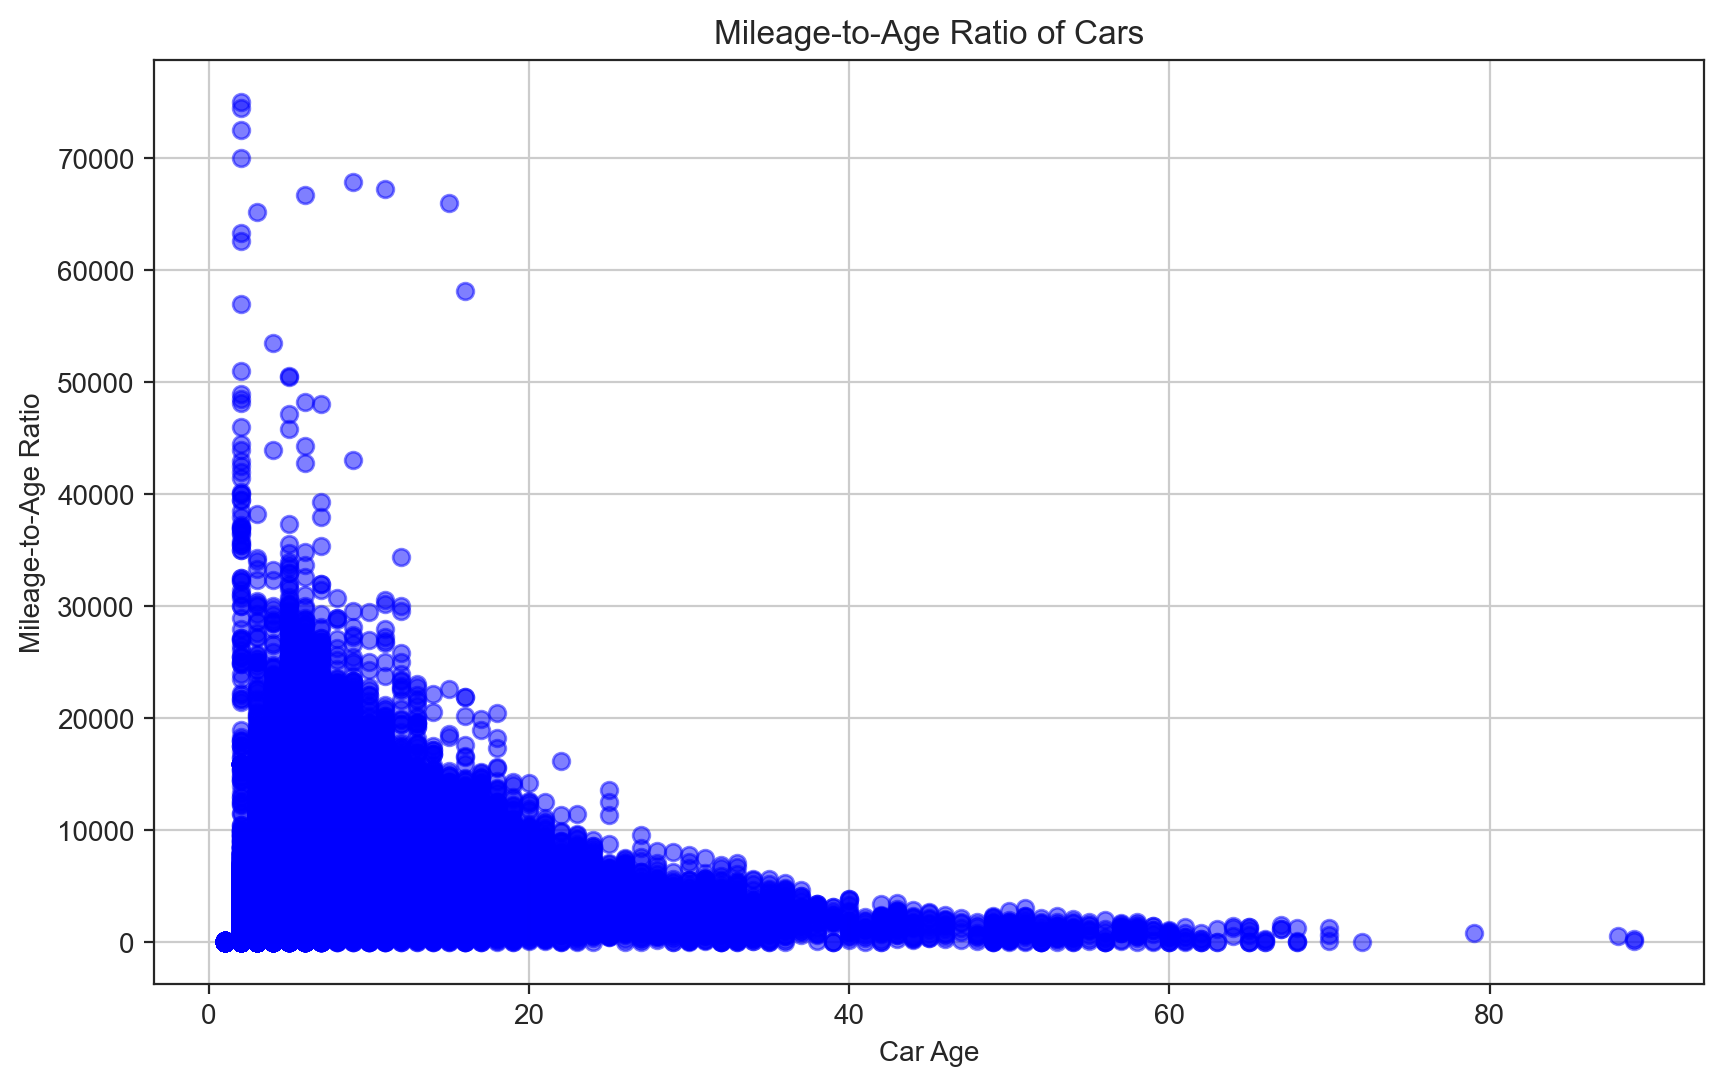

In [180]:
# Plot mileage to age ratio
plt.figure(figsize=(10, 6))
plt.scatter(ca['car_age'], ca['mil_to_age_ratio'], color='blue', alpha=0.5)
plt.title('Mileage-to-Age Ratio of Cars')
plt.xlabel('Car Age')
plt.ylabel('Mileage-to-Age Ratio')
plt.grid(True)
plt.show()


# Price density and Vehicle condition comparison

In [181]:
ca['vehicle_condition'].value_counts()

vehicle_condition
USED    368756
NEW      24438
Name: count, dtype: int64

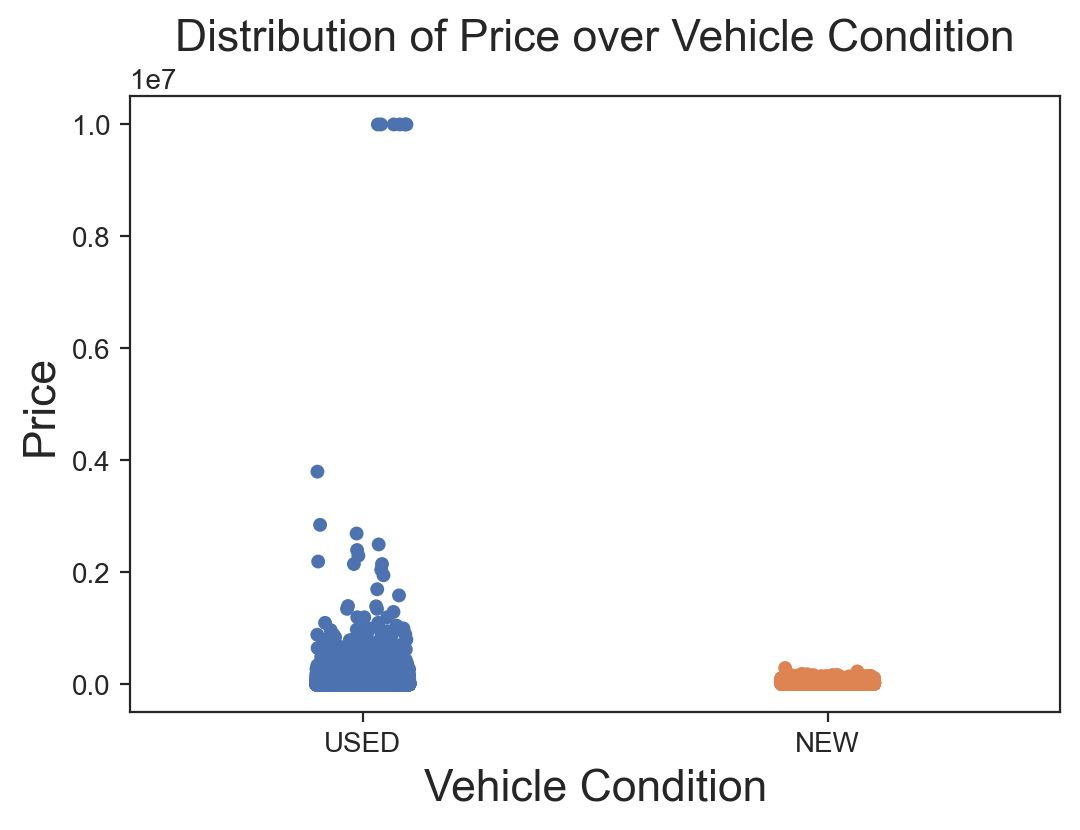

In [182]:
sns.stripplot(data = ca.sort_values('price',ascending=True), y='price', x='vehicle_condition', jitter=.1, palette='deep')
plt.ylabel('Price', fontsize=16)
plt.xlabel('Vehicle Condition', fontsize=16)
plt.title('Distribution of Price over Vehicle Condition', fontsize=16)
plt.show()

we also see that for the price range what is the vehicle condition is it new or used, so we use the price range less and equal to 100000 and found that in this range mostly cars are used and very few new cars.this is also because datasety has more used cars than the new one

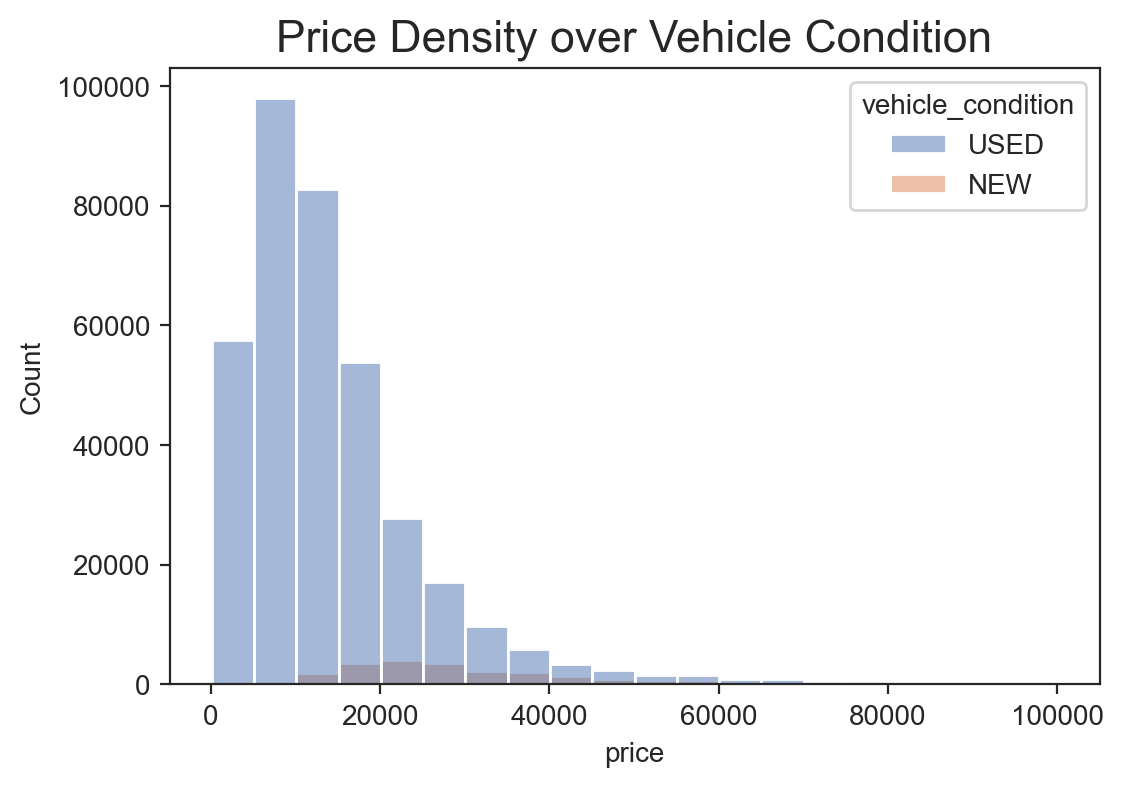

In [183]:
#visualize the vehicle condition distribution with repect to price
sns.histplot(ca.loc[ca.price<=100000], x='price',hue='vehicle_condition',bins=20)
plt.title('Price Density over Vehicle Condition', fontsize=16);

for another price range we see that more new cars are in price range 100000 to 200000, and still used cars are there too in this range

In [184]:
#examine one more data subset for price
ca.loc[(ca['price'] > 100000) & (ca['price'] <= 200000)]

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,price,body_type,fuel_type,car_age,mil_to_age_ratio
24626,500.0,White,AC,Cobra,USED,129500,Convertible,Petrol,60,8
252583,1500.0,Black,Aston Martin,DBS,USED,184990,Convertible,Petrol,2,750
181706,4500.0,Grey,Aston Martin,DBS,USED,165990,Coupe,Petrol,4,1125
291811,6517.0,Black,Aston Martin,Vanquish,USED,145900,Convertible,Petrol,5,1303
70990,102662.0,Green,Aston Martin,Vantage,USED,199950,Coupe,Petrol,44,2333
...,...,...,...,...,...,...,...,...,...,...
228223,14830.0,Grey,Rolls-Royce,Dawn,USED,170000,Convertible,Petrol,6,2471
227362,6000.0,Black,Rolls-Royce,Phantom,USED,195000,Limousine,Petrol,12,500
5342,7000.0,Black,Rolls-Royce,Wraith,USED,124995,Coupe,Petrol,8,875
305907,30929.0,Black,Rolls-Royce,Phantom,USED,169995,Convertible,Petrol,12,2577


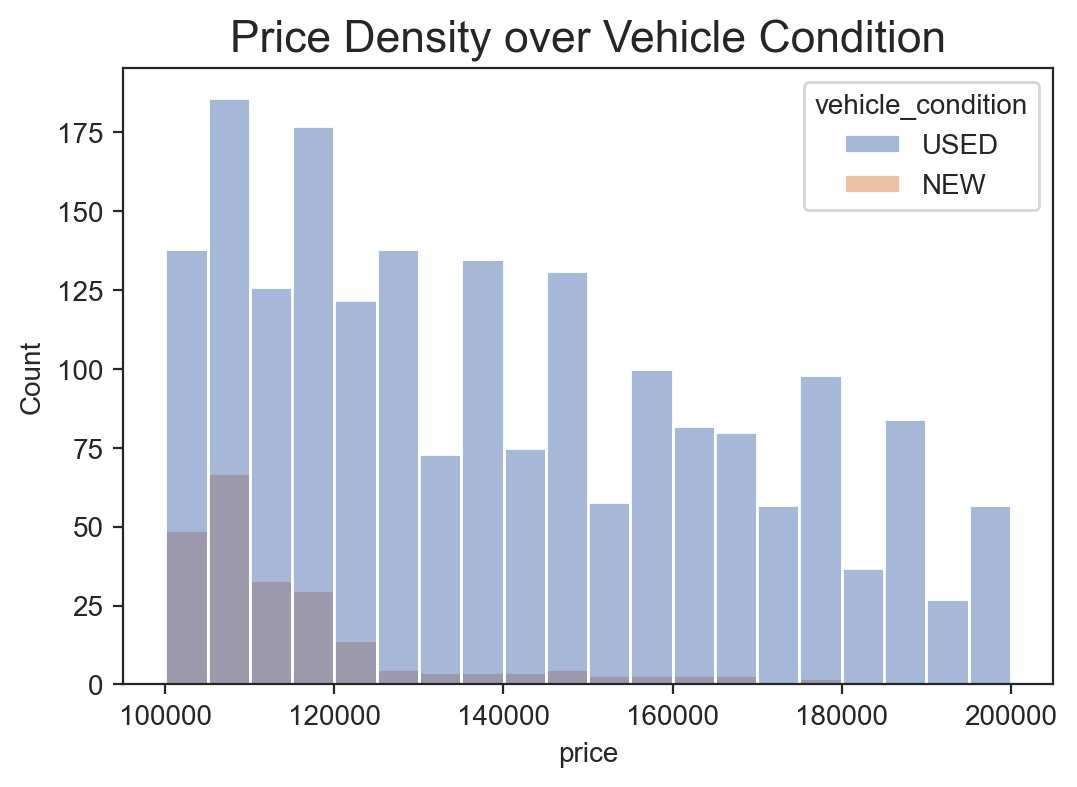

In [185]:
sns.histplot(data=ca.loc[(ca['price'] > 100000) & (ca['price'] <= 200000)], x='price',hue='vehicle_condition', bins=20)
plt.title('Price Density over Vehicle Condition', fontsize=16);

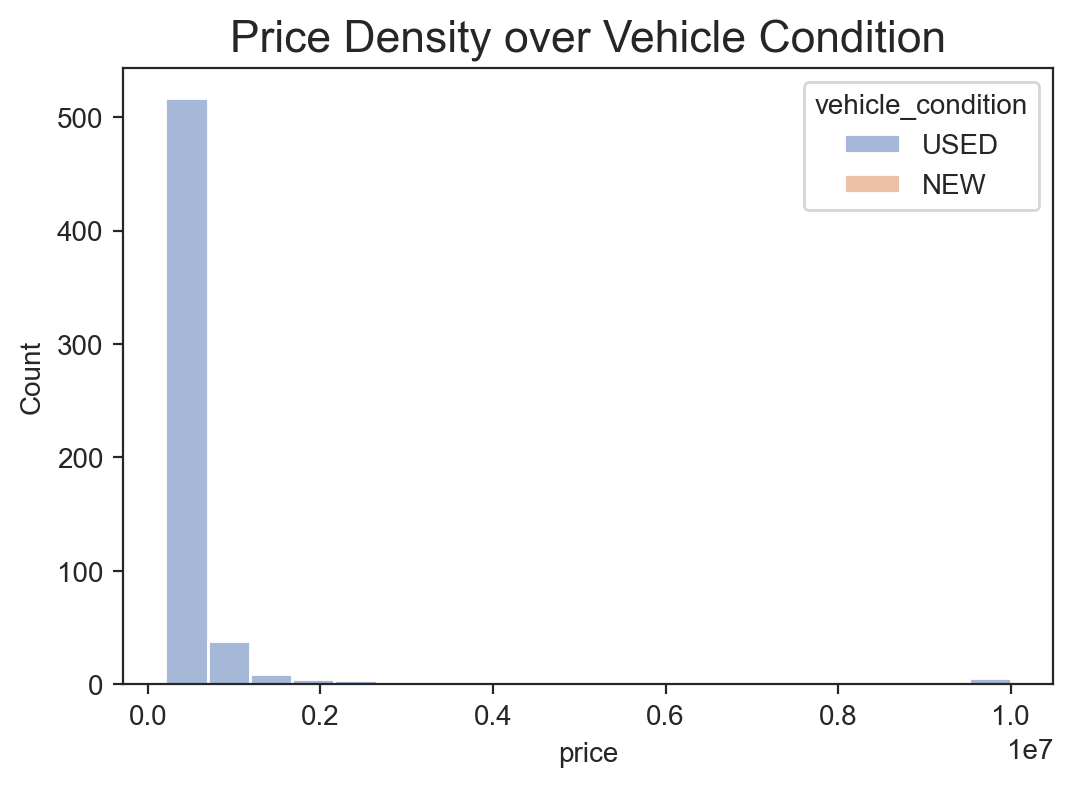

In [186]:
#visualize the vehicle condition distribution with repect to price
sns.histplot(ca.loc[ca.price>200000], x='price',hue='vehicle_condition',bins=20)
plt.title('Price Density over Vehicle Condition', fontsize=16);

# Machine Learning Model Building

now all our data is clean and we established a data frame for machine learning algorithm so we will start our model building process.

In [187]:
#examine one more data subset for price
ca.loc[ca['price'] > 300000]

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,price,body_type,fuel_type,car_age,mil_to_age_ratio
364585,87063.0,Silver,Aston Martin,DB6,USED,345000,Saloon,Petrol,55,1582
177451,1672.0,Red,Aston Martin,Vanquish,USED,534000,Coupe,Petrol,6,278
305767,135.0,Yellow,Aston Martin,DB6,USED,595000,Saloon,Petrol,53,2
27722,960.0,Green,Aston Martin,Vanquish,USED,598000,Coupe,Petrol,3,320
145524,152.0,Blue,Aston Martin,DB2,USED,560000,Convertible,Petrol,2,76
...,...,...,...,...,...,...,...,...,...,...
335736,139.0,White,Rolls-Royce,Dawn,USED,319950,Convertible,Petrol,2,69
367067,100.0,Black,Rolls-Royce,Dawn,USED,349950,Convertible,Petrol,2,50
243421,13570.0,Black,Rolls-Royce,Phantom,USED,324850,Coupe,Petrol,8,1696
375245,103.0,Green,Rolls-Royce,Phantom,USED,374950,Limousine,Petrol,2,51


we see that our data maily lies in the price range upto 300000, above this price we only have 216 rows and these refers to very luxury cars and their price range is really high but we want to predict the price generally and these top luxury brands will not be stable with machine learning algorithm. we modify our dataframe for machine learning models as folllows

In [188]:
caml=ca.loc[ca['price'] <= 300000]

In [189]:
caml.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,price,body_type,fuel_type,car_age,mil_to_age_ratio
343931,700.0,Black,AC,Cobra,USED,94950,Convertible,Petrol,60,11
274772,700.0,White,AC,Cobra,USED,94950,Convertible,Petrol,60,11
24626,500.0,White,AC,Cobra,USED,129500,Convertible,Petrol,60,8
245524,3000.0,Grey,AK,Cobra,USED,44995,Convertible,Petrol,11,272
105460,24446.0,Black,Abarth,595,USED,11500,Hatchback,Petrol,6,4074


In [190]:
caml.shape

(392978, 10)

In [191]:
caml.describe(include='all')

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,price,body_type,fuel_type,car_age,mil_to_age_ratio
count,392978.000000,392978,392978,392978,392978,392978.000000,392978,392978,392978.000000,392978.000000
unique,NaN,22,108,1142,2,NaN,16,9,NaN,NaN
top,NaN,Black,BMW,Golf,USED,NaN,Hatchback,Petrol,NaN,NaN
freq,NaN,86699,37221,11457,368540,NaN,163464,210549,NaN,NaN
mean,38528.642873,NaN,NaN,NaN,NaN,16684.773580,NaN,NaN,6.592043,5134.700986
std,34676.936547,NaN,NaN,NaN,NaN,17768.452634,NaN,NaN,4.456681,3554.421251
min,0.000000,NaN,NaN,NaN,NaN,120.000000,NaN,NaN,1.000000,0.000000
25%,11557.000000,NaN,NaN,NaN,NaN,7449.000000,NaN,NaN,4.000000,2687.000000
50%,29484.000000,NaN,NaN,NaN,NaN,12490.000000,NaN,NaN,5.000000,4803.000000
75%,57644.000000,NaN,NaN,NaN,NaN,19990.000000,NaN,NaN,8.000000,7050.000000


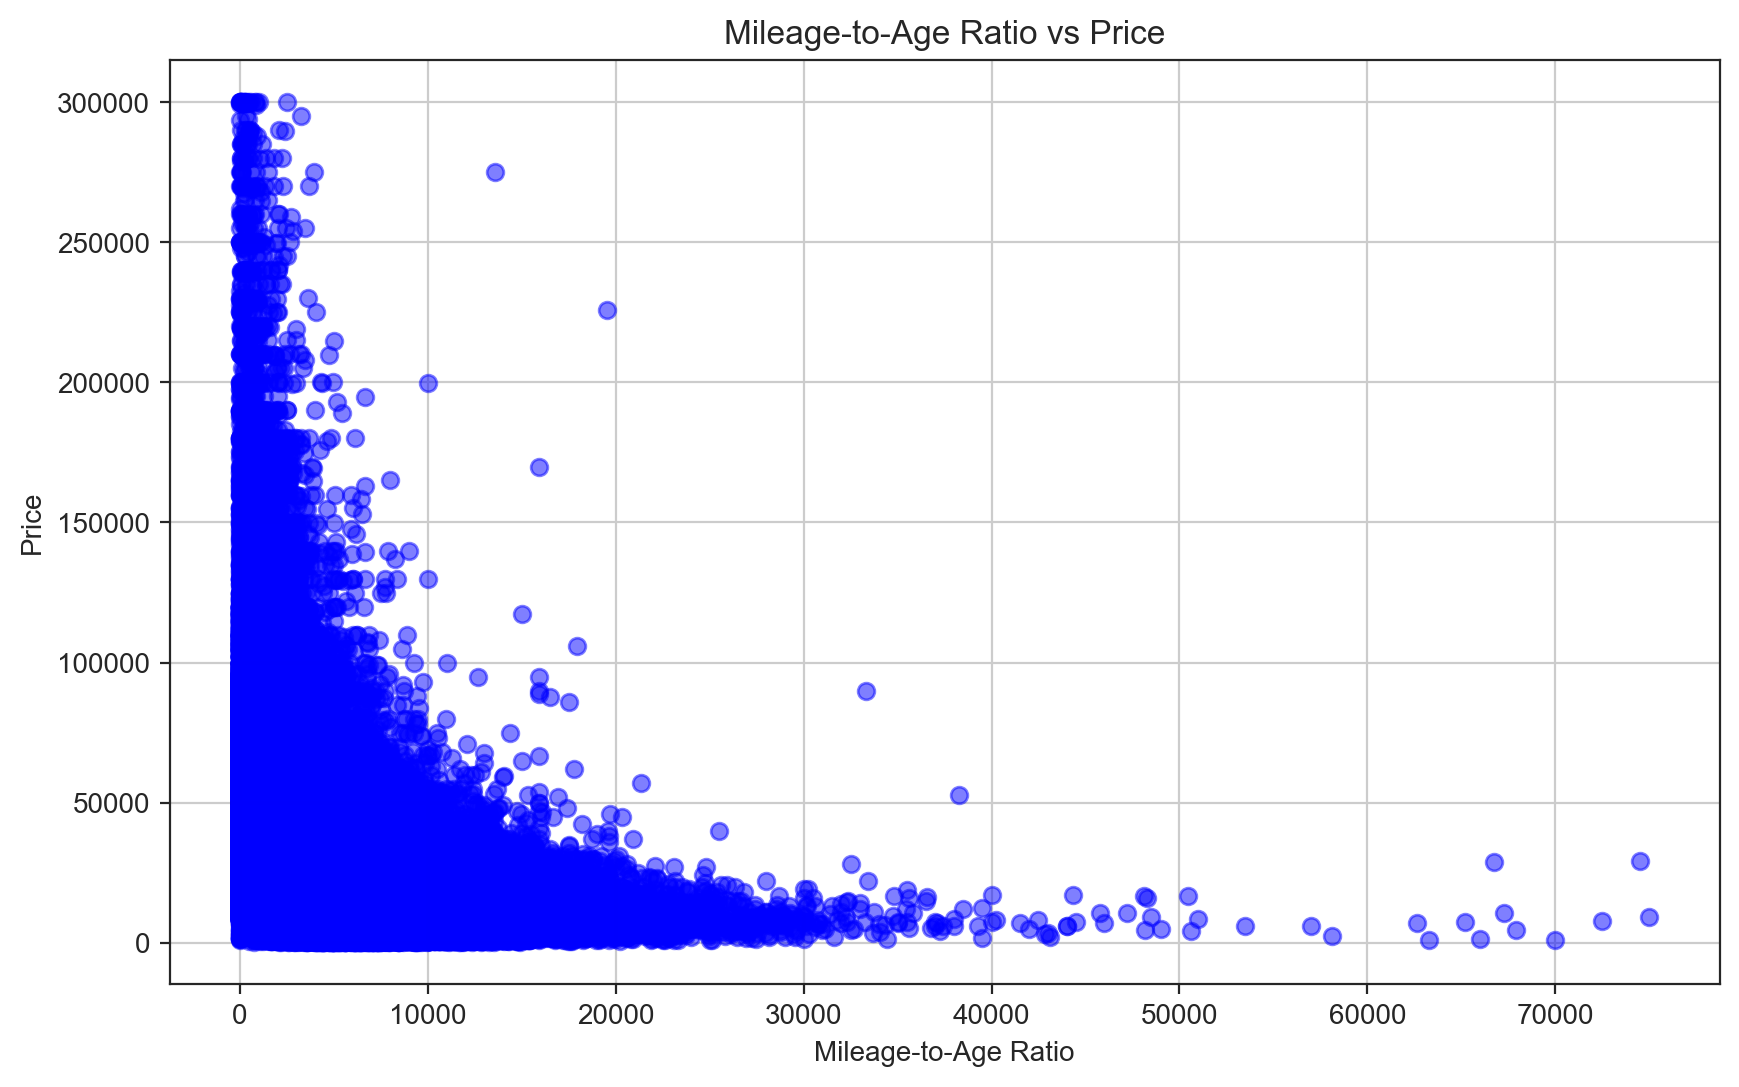

In [192]:
# Plot mileage-to-age ratio vs price
plt.figure(figsize=(10, 6))
plt.scatter(caml['mil_to_age_ratio'], caml['price'], color='blue', alpha=0.5)
plt.title('Mileage-to-Age Ratio vs Price')
plt.xlabel('Mileage-to-Age Ratio')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [193]:
caml.isna().sum()

mileage              0
standard_colour      0
standard_make        0
standard_model       0
vehicle_condition    0
price                0
body_type            0
fuel_type            0
car_age              0
mil_to_age_ratio     0
dtype: int64

In [194]:
caml.drop(['mil_to_age_ratio'], axis=1, inplace=True)

we set our target variable y and split the data in train and test sets and define our categirical columns and apply target encoding to setup preprocessorr for our models.

In [195]:
# setting the target variable
X = caml.drop('price', axis=1)
y = caml['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
from sklearn.preprocessing import StandardScaler
# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Create a pipeline with target encoding and decision tree regression
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), numerical_features),
        ('target_encoder', TargetEncoder(target_type='continuous').set_output(transform=
        'pandas'), categorical_features)
                ],
    remainder='passthrough'
)

In [197]:
# Perform automated feature selection using Recursive Feature Elimination (RFE)
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create a pipeline with preprocessor and RFE with Linear Regression
pipeline_rfe = Pipeline([
    ('preprocessor', preprocessor),  # Your preprocessor defined earlier
    ('feature_selection_rfe', RFE(estimator=LinearRegression(), n_features_to_select=10)),  # RFE with Linear Regression
    ('regressor', LinearRegression())  # Linear Regression model
])

# Fit the pipeline on the training data
pipeline_rfe.fit(X_train, y_train)
# Access the support_ attribute of RFE to get the selected features mask
selected_features_mask = pipeline_rfe.named_steps['feature_selection_rfe'].support_

# Get the feature names from the preprocessor
all_feature_names = numerical_features + categorical_features

# Filter the feature names using the selected features mask
selected_features_rfe = [feature_name for feature_name, is_selected in zip(all_feature_names, selected_features_mask) if is_selected]

# Print the selected features
print("Selected Features:", selected_features_rfe)



# Evaluate the pipeline on the test data
mse_rfe = mean_squared_error(y_test, pipeline_rfe.predict(X_test))
rmse_rfe = np.sqrt(mse_rfe)
print("MSE on test data:", mse_rfe)
print("RMSE on test data:", rmse_rfe)


Selected Features: ['mileage', 'car_age', 'standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'body_type', 'fuel_type']
MSE on test data: 66821133.66101507
RMSE on test data: 8174.419469357752


In [198]:
# Fit the pipeline on the training data
pipeline_rfe.fit(X_train, y_train)

# Access the coefficients of the linear regression model
coefficients = pipeline_rfe.named_steps['regressor'].coef_

# Create a DataFrame to display feature coefficients along with feature names
feature_coefficients_df = pd.DataFrame({'Feature': selected_features_rfe, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient magnitudes in descending order
feature_coefficients_df = feature_coefficients_df.sort_values(by='Coefficient', ascending=False)

# Print the DataFrame
print("Feature Coefficients:")
print(feature_coefficients_df)


Feature Coefficients:
             Feature  Coefficient
4     standard_model     0.809738
5  vehicle_condition     0.396526
3      standard_make     0.247452
7          fuel_type     0.230646
2    standard_colour     0.072724
6          body_type     0.016260
1            car_age -1701.620414
0            mileage -3712.095352


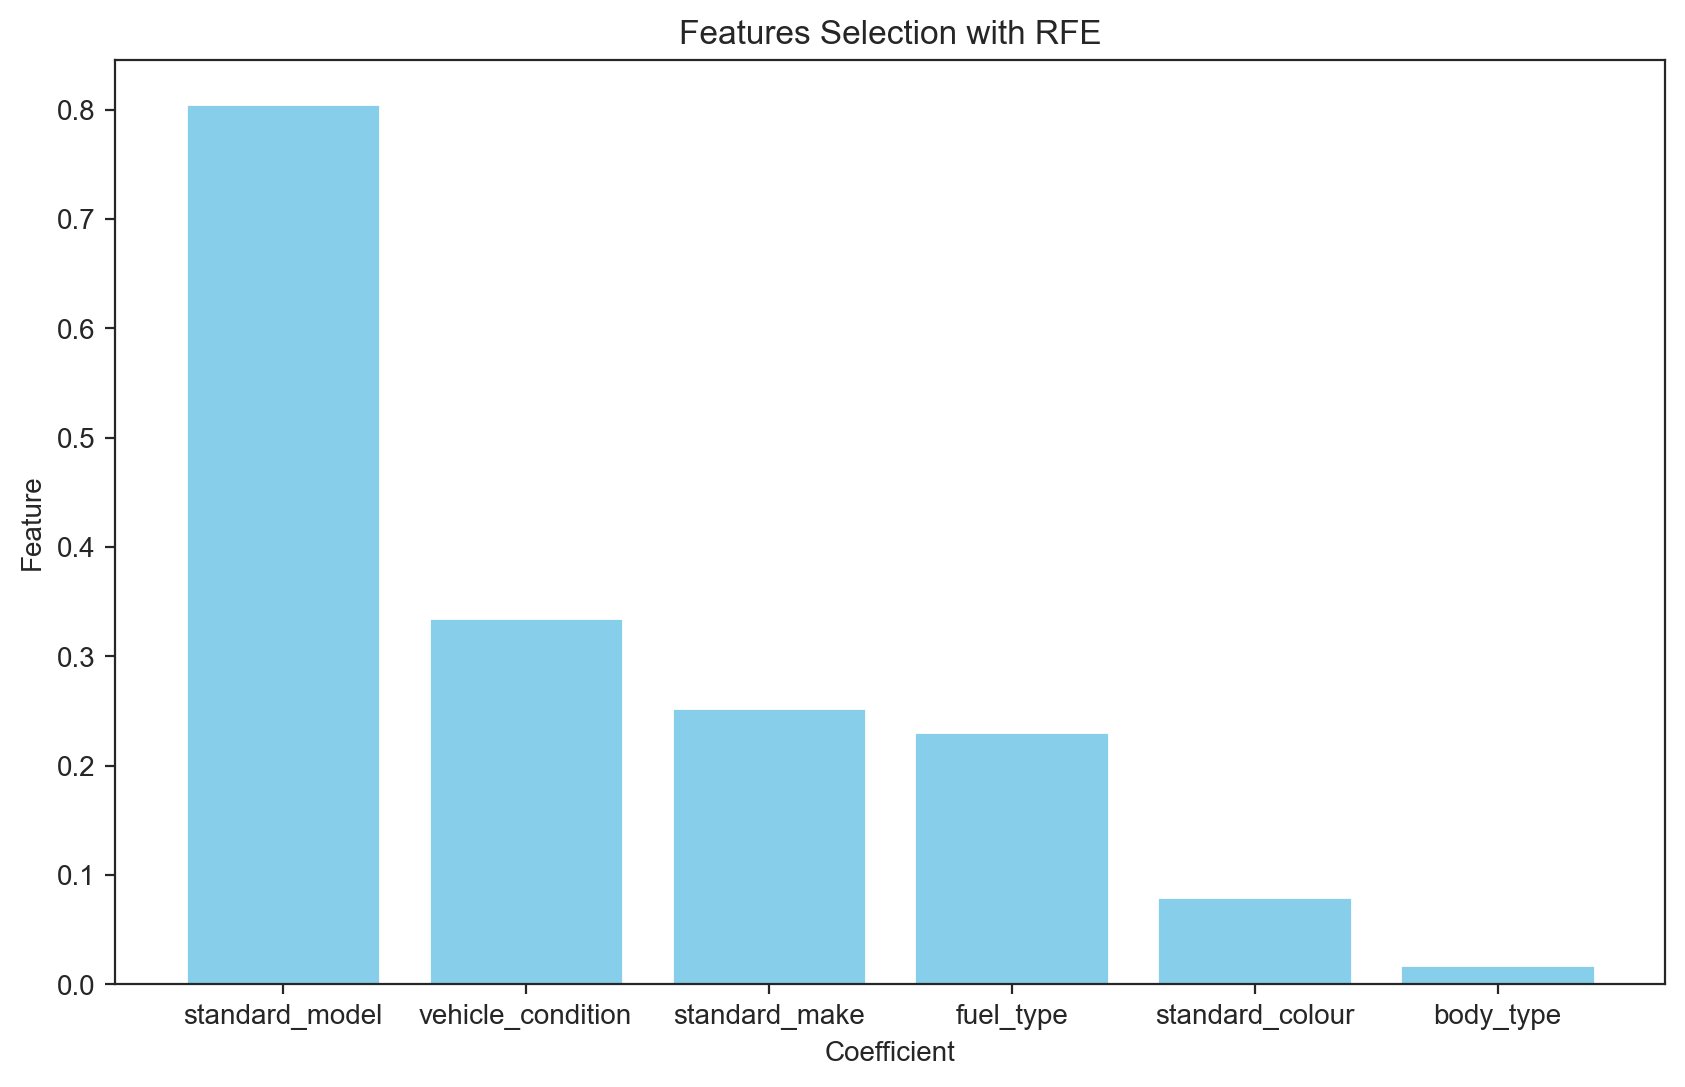

In [199]:
# Extract features and coefficients
features = ['standard_model', 'vehicle_condition', 'standard_make', 'fuel_type', 'standard_colour', 'body_type']
coefficients = [0.804992, 0.334722, 0.252995, 0.231205, 0.080069, 0.017873]
# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(features, coefficients, color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Features Selection with RFE')
plt.show()

In [70]:

from sklearn.feature_selection import SelectKBest, f_regression
# Create a pipeline with preprocessor, feature selection, and model
pipeline_kbest = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection_kbest', SelectKBest(score_func=f_regression, k=8))# Select top 10 features
])

# Fit the pipeline on the training data
pipeline_kbest.fit(X_train, y_train)
# Get the selected features from SelectKBest
selected_features_kbest = pipeline_kbest.named_steps['feature_selection_kbest'].get_support()

# Extract the names of the selected features
selected_features_kb = [feature for feature, selected in zip(X.columns, selected_features_kbest) if selected]

# Print the selected features
print("Selected Features:", selected_features_kb)


Selected Features: ['mileage', 'standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'body_type', 'fuel_type', 'car_age']


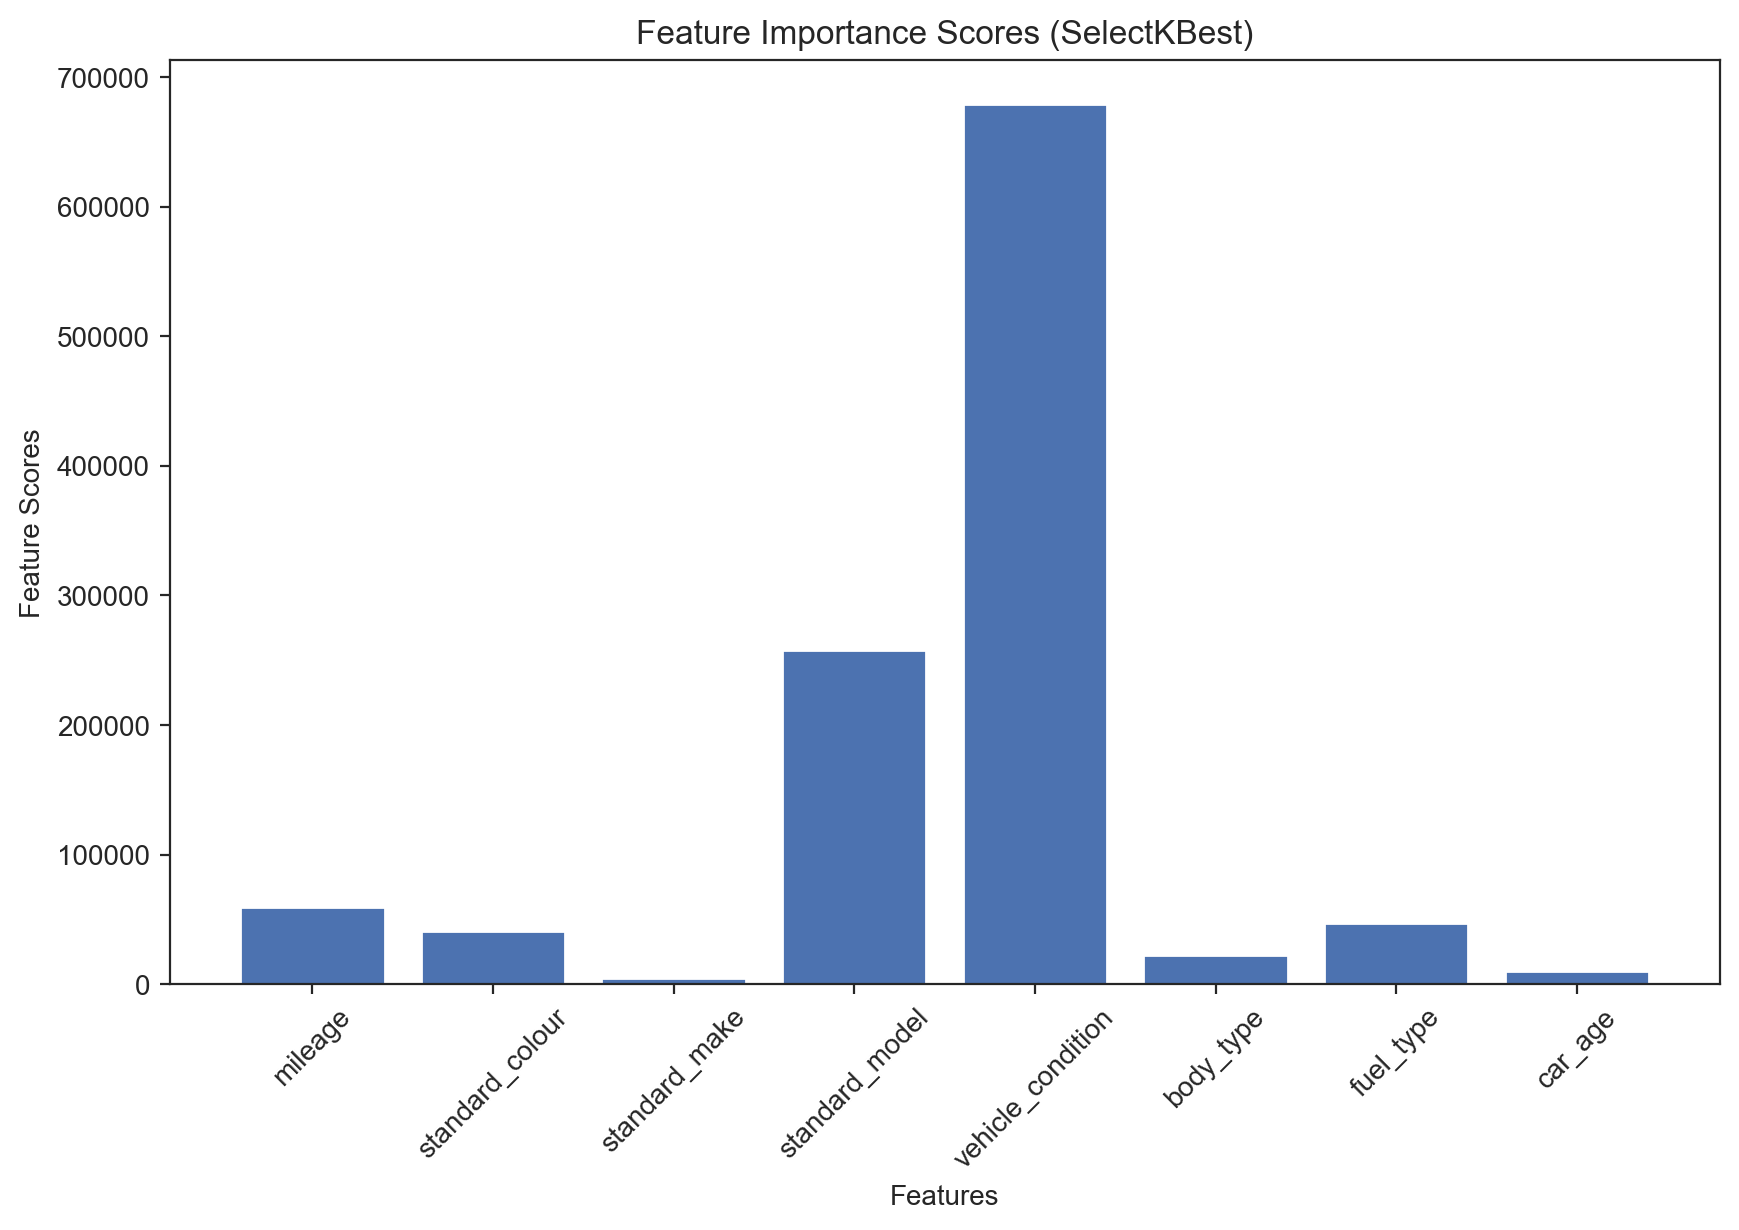

In [71]:
# Get feature scores from SelectKBest
feature_scores = pipeline_kbest.named_steps['feature_selection_kbest'].scores_


# Create a bar plot of feature scores
plt.figure(figsize=(10, 6))
plt.bar(selected_features_kb, feature_scores)
plt.xlabel('Features')
plt.ylabel('Feature Scores')
plt.title('Feature Importance Scores (SelectKBest)')
plt.xticks(rotation=45)
plt.show()


In [72]:
# Apply dimensionality reduction using PCA
# Define the pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
pipeline_pca = Pipeline([
    ('preprocessor', preprocessor),  # Your preprocessor defined earlier
    ('pca', PCA(n_components=8)),  # PCA with 10 components
    ('regressor', HistGradientBoostingRegressor())
])

# Fit the pipeline on the training data
pipeline_pca.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['mileage', 'car_age']),
                                                 ('target_encoder',
                                                  TargetEncoder(target_type='continuous'),
                                                  ['standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type',
                                                   'fuel_type'])])),
                ('pca', PCA(n_components=8)),
                ('regressor', HistGradientBoostingRegressor())])

In [73]:
predictions_pca = pipeline_pca.predict(X_test)
# Evaluate the pipeline on the test data
mse_pca = mean_squared_error(y_test, predictions_pca)
rmse_pca = np.sqrt(mse_pca)
print("MSE on test data:", mse_pca)
print("RMSE on test data:", rmse_pca)

MSE on test data: 31459993.451752998
RMSE on test data: 5608.920881217081


# Pipeline for Random Forest Model

now with our preprocessor we will build a pipeline for Random Forest regression model as our target variable is continuous so we will take regression models then we will fit this pipeline to our train data and mke predictions for our test data.

In [74]:
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor',  RandomForestRegressor(max_depth=13))
])

# Fit the pipeline on the training data
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['mileage', 'car_age']),
                                                 ('target_encoder',
                                                  TargetEncoder(target_type='continuous'),
                                                  ['standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type',
                                                   'fuel_type'])])),
                ('regressor', RandomForestRegressor(max_depth=13))])

In [75]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Make predictions on the test set
predictions_rf = pipeline_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, predictions_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, predictions_rf)
mae_rf = mean_absolute_error(y_test, predictions_rf)


print(f'MSE Random Forest: {mse_rf}')
print(f'RMSE Random Forest: {rmse_rf}')
print(f'R-2 Random Forest: {r2_rf}')
print(f'MAE Random Forest: {mae_rf}')

MSE Random Forest: 22811462.379117705
RMSE Random Forest: 4776.134669282023
R-2 Random Forest: 0.927817341992935
MAE Random Forest: 2158.7915283448892


We evaluate the randomforest regressor model's efficiency with different metrices and it this performs well with our data and R-2 score is satisfactory. we notice that we get best R-2 score with max_depth=13

# Pipeline for Linear Regression Model

Now we will see how linear regression will perform so we set the pipeline for this model

In [76]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures((3, 3), include_bias=False)),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipeline_lr.fit(X_train, y_train)

# Make predictions on the test set
predictions_lr = pipeline_lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, predictions_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, predictions_lr)
mae_lr = mean_absolute_error(y_test, predictions_lr)
cv_scores_lr = cross_val_score(pipeline_lr, X_train, y_train, cv=5)  # cv=5 means 5-fold cross-validation

# Print the cross-validated scores
print("CV scores lr:", cv_scores_lr)
print("Mean CV score lr:", np.mean(cv_scores_lr))
print("Std of CV scores lr:", np.std(cv_scores_lr))
print(f'MSE lr: {mse_lr}')
print(f'RMSE lr: {rmse_lr}')
print(f'R-2 lr: {r2_lr}')
print(f'MAE lr: {mae_lr}')

CV scores lr: [0.85862794 0.87142255 0.84875621 0.85993722 0.84768967]
Mean CV score lr: 0.8572867183042279
Std of CV scores lr: 0.008643132766263162
MSE lr: 45287928.263472654
RMSE lr: 6729.63061865008
R-2 lr: 0.8566947184989206
MAE lr: 3193.2347589168794


Linear Regression performs really badly. This is as expected due to non-linearity of the dataset.Mean CV score and R-2 score for this model is low.

# Pipeline for Hist Gradient Boosting Regression Model

we will set our pipeline with our final model which is histogram-based gradient boosting regression model and see how well it performs

In [77]:
from sklearn.ensemble import HistGradientBoostingRegressor

pipeline_hgb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', HistGradientBoostingRegressor(max_depth=11))
])
# Fit the pipeline on the training data
pipeline_hgb.fit(X_train, y_train)

# Make predictions on the test set
predictions_hgb = pipeline_hgb.predict(X_test)

# Evaluate the model
mse_hgb = mean_squared_error(y_test, predictions_hgb)
rmse_hgb = np.sqrt(mse_hgb)
r2_hgb = r2_score(y_test, predictions_hgb)
mae_hgb = mean_absolute_error(y_test, predictions_hgb)
cv_scores_hgb = cross_val_score(pipeline_hgb, X_train, y_train, cv=5)  # cv=5 means 5-fold cross-validation

# Print the cross-validated scores
print("CV scores HGB:", cv_scores_hgb)
print("Mean CV score HGB:", np.mean(cv_scores_hgb))
print("Std of CV scores HGB:", np.std(cv_scores_hgb))
print(f'MSE HGB: {mse_hgb}')
print(f'RMSE HGB: {rmse_hgb}')
print(f'R-2 HGB: {r2_hgb}')
print(f'MAE HGB: {mae_hgb}')

CV scores HGB: [0.90828715 0.91582347 0.9000972  0.89947893 0.91365074]
Mean CV score HGB: 0.9074674981607089
Std of CV scores HGB: 0.006735950295940871
MSE HGB: 28712118.95779086
RMSE HGB: 5358.369057632262
R-2 HGB: 0.9091458044668967
MAE HGB: 2463.091348873678


we see an improvement here with histgradient boost regression model as compared to other two regression models, R-2 score is good enough as wel as RMSE is low.

In [78]:
from sklearn.ensemble import VotingRegressor

# Create an ensemble with averaging
ensemble_avg = VotingRegressor([
    ('linear_regression', pipeline_lr),
    ('random_forest', pipeline_rf),
    ('hist_gradient_boosting', pipeline_hgb)
])

# Fit the ensemble on the training data
ensemble_avg.fit(X_train, y_train)

# Evaluate the ensemble on the test data
mse_vot = mean_squared_error(y_test, ensemble_avg.predict(X_test))
rmse_vot = np.sqrt(mse_vot)
print("MSE on test data (Ensemble - Averaging):", mse_vot)
print("RMSE on test data (Ensemble - Averaging):", rmse_vot)



MSE on test data (Ensemble - Averaging): 27364299.788225036
RMSE on test data (Ensemble - Averaging): 5231.089732381298


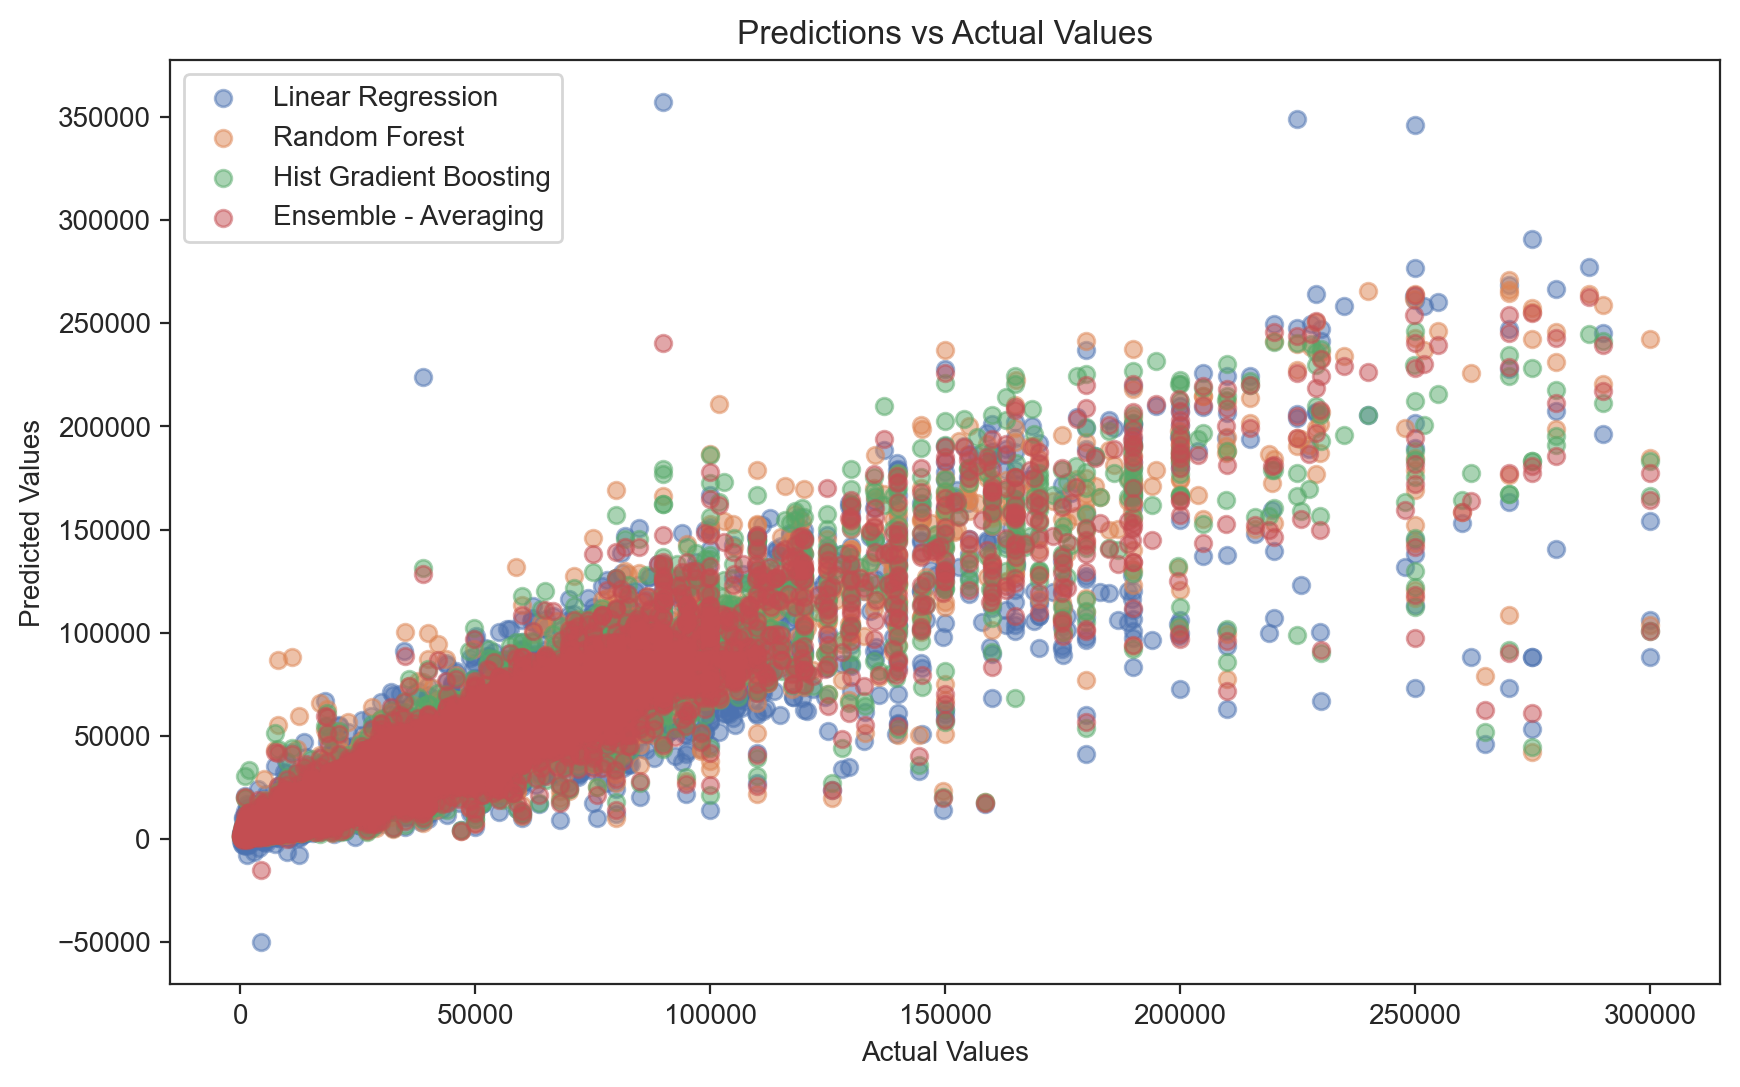

In [79]:
y_pred_ensemble = ensemble_avg.predict(X_test)
# Plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_lr, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, predictions_rf, label='Random Forest', alpha=0.5)
plt.scatter(y_test, predictions_hgb, label='Hist Gradient Boosting', alpha=0.5)
plt.scatter(y_test, y_pred_ensemble, label='Ensemble - Averaging', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()


In [80]:
xt = X.head(20)
yt = y.head(20)
pred_hgb = pipeline_hgb.predict(xt)
pred_rf = pipeline_rf.predict(xt)
pred_lr = pipeline_lr.predict(xt)
pred_ens =ensemble_avg.predict(xt)

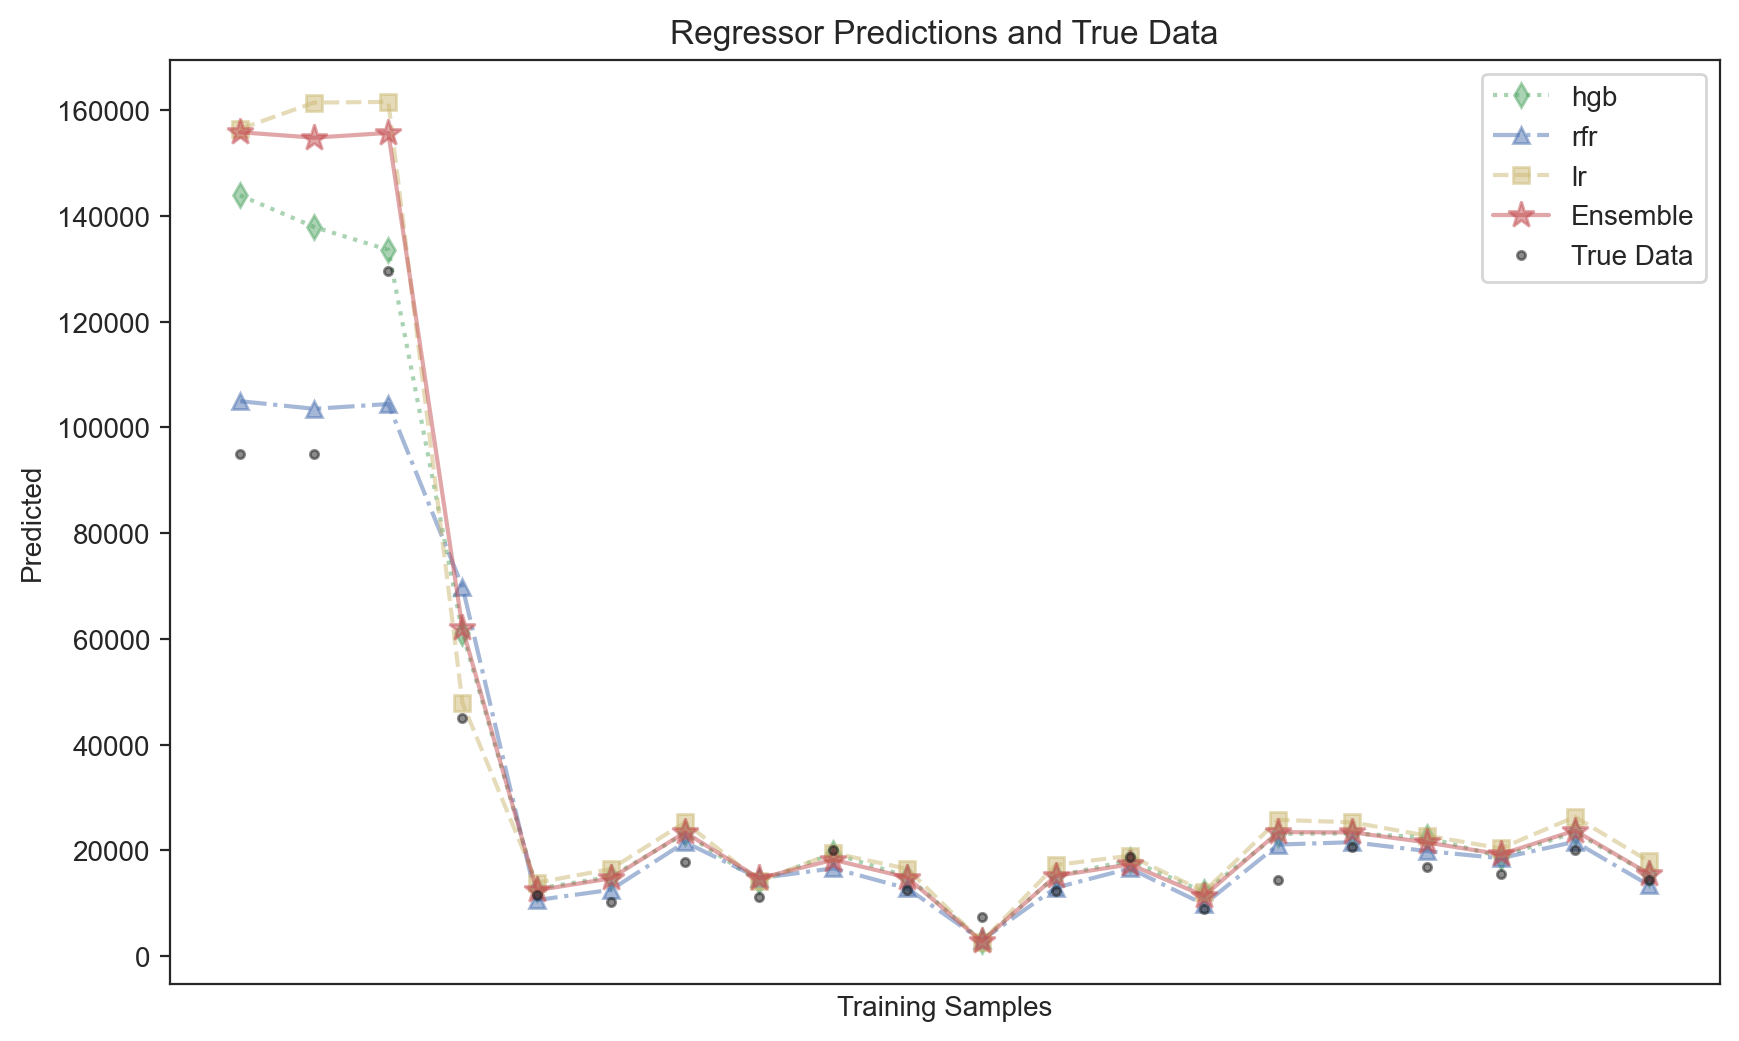

In [81]:
# Generate a range of indices corresponding to the number of training samples
indices = np.arange(len(yt))

# Plot the predicted values against the generated indices
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(indices, pred_hgb, "gd:", alpha=0.5, label="hgb")
ax.plot(indices, pred_rf, "b^-.", alpha=0.5, label="rfr")
ax.plot(indices, pred_lr, "ys--", alpha=0.5, label="lr")
ax.plot(indices, pred_ens, "r*-", alpha=0.5, ms=10, label="Ensemble")
ax.plot(indices, yt, "ko", alpha=0.5, ms=3, label="True Data")

# Customize plot properties
ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
ax.set_ylabel("Predicted")
ax.set_xlabel("Training Samples")
ax.legend(loc="best")
ax.set_title("Regressor Predictions and True Data")

# Show the plot
plt.show()


# Create a dataframe of the performance metrices

we now create a dataframe to compare R2 and RMSE values for our three regression models and see which model performs best.

In [82]:
# Create a dataframe of R2 and RMSE values 
r2_scores = pd.DataFrame({
    'LinearRegression' : {'R-2': r2_lr, 'RMSE' : rmse_lr},
    'RandomForest' : {'R-2': r2_rf, 'RMSE' : rmse_rf},
    'HistGradientBoost' : {'R-2': r2_hgb, 'RMSE' : rmse_hgb},
    'RFE' : { 'RMSE' : rmse_rfe},
    'PCA' : { 'RMSE' : rmse_pca}
})
r2_scores

,LinearRegression,RandomForest,HistGradientBoost,RFE,PCA
R-2,0.856695,0.927817,0.909146,NaN,NaN
RMSE,6729.630619,4776.134669,5358.369058,8174.730099,5608.920881


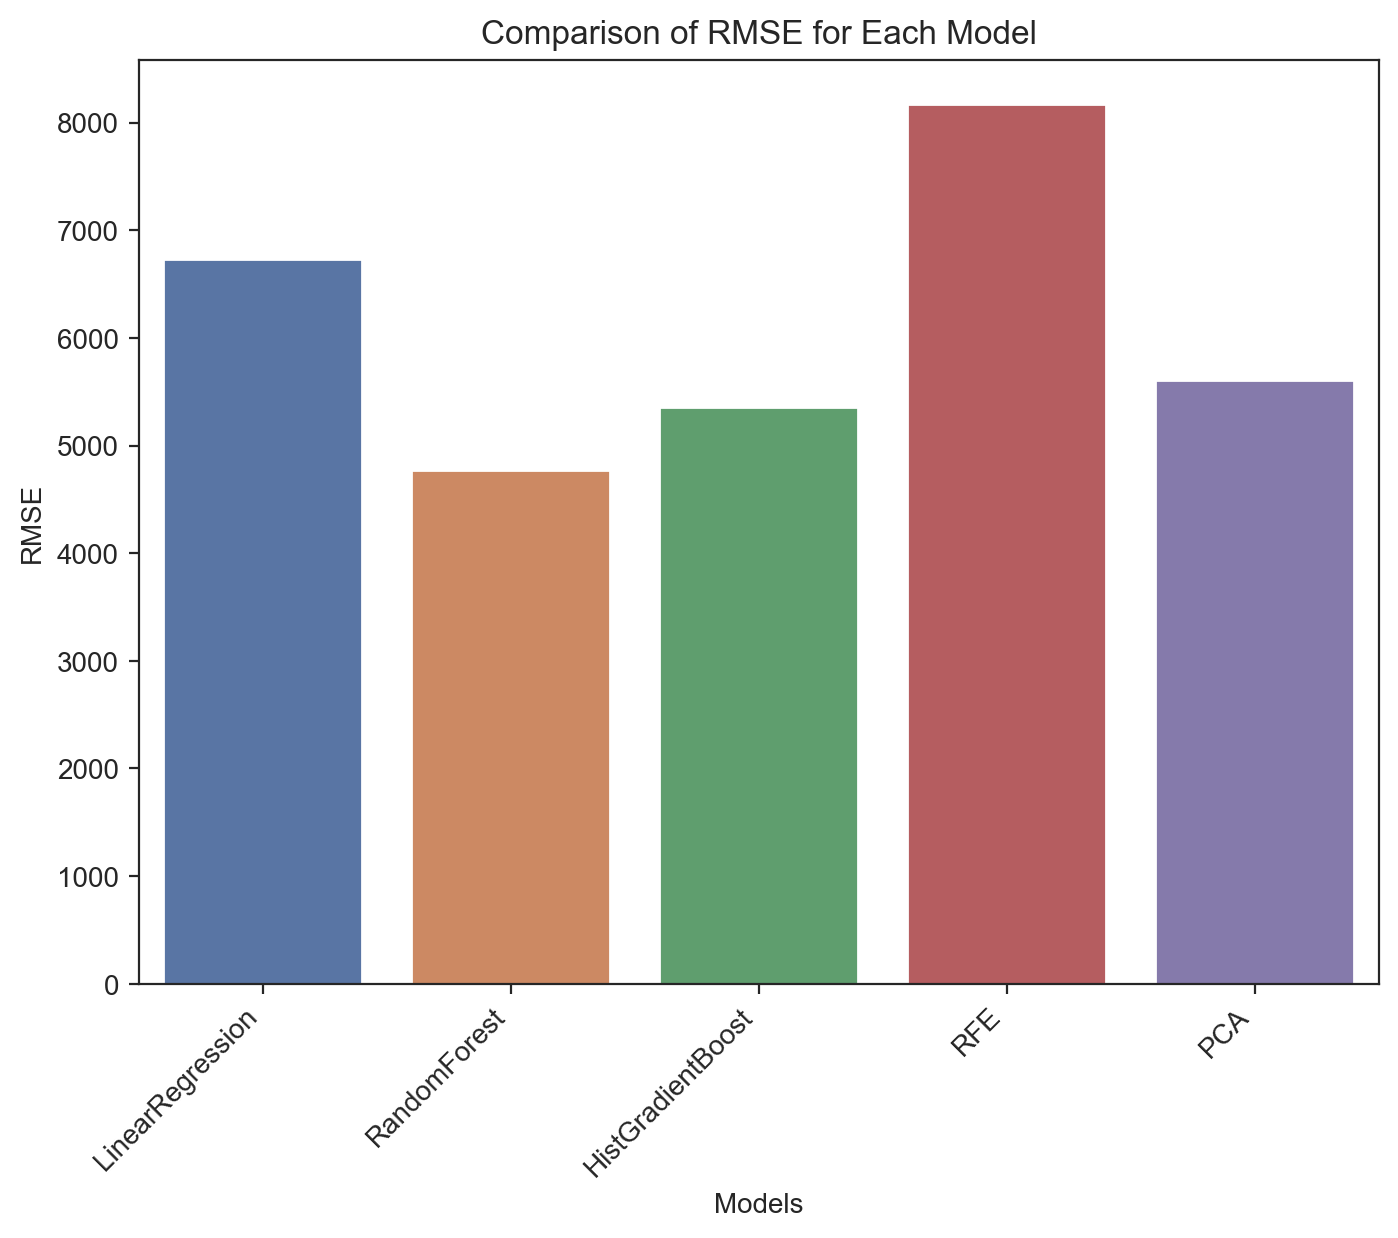

In [83]:
# Plot the RMSE values for each model
alg = r2_scores.columns
rmse_val = r2_scores.loc['RMSE']

# Plot the RMSE values for all the models
plt.figure(figsize=(8, 6))
sns.barplot(x=alg, y=rmse_val)
plt.title('Comparison of RMSE for Each Model')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.show()


so RMSE value is high for Linear regression model and it is low for decision tree model, for Knn it is slightly greater than decision tree regression model. this shows that decision tree model performs well for our dataset and we will further see the predictions from this model

# Defining and Visualizing the Feature Importance

As decision tree regression model performs well on our data so now we see that which contributes more to make better predictions  features 

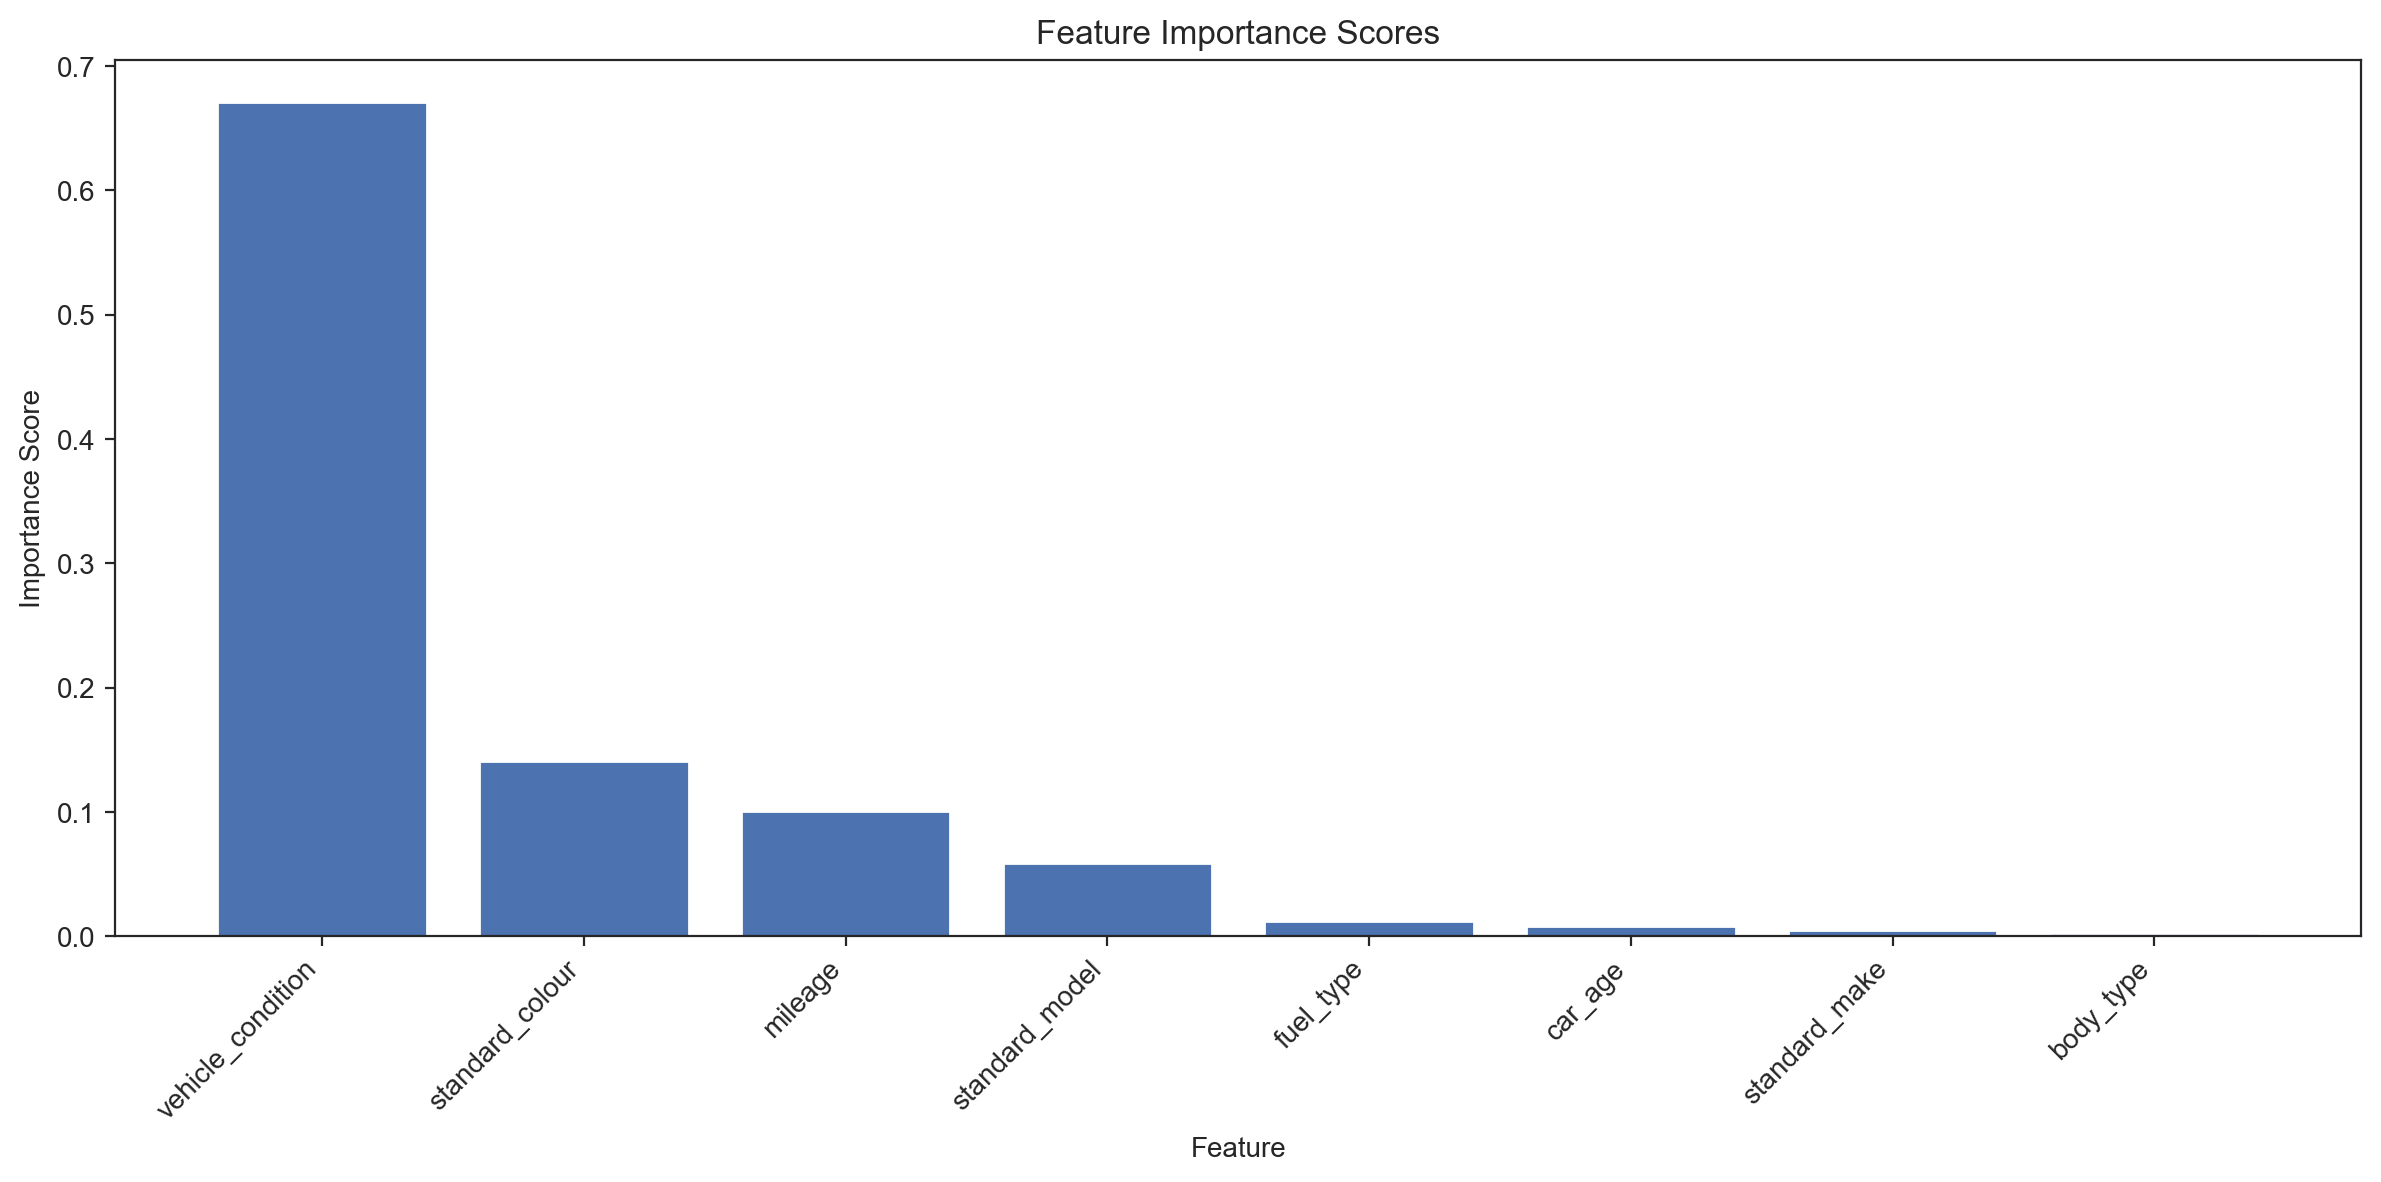

In [84]:
# Extract feature importan
feature_importance = pipeline_rf.named_steps['regressor'].feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_caml = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance scores
feature_importance_caml = feature_importance_caml.sort_values(by='Importance', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_caml['Feature'], feature_importance_caml['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

here we can see that Vehicle condition is the feature with high importance score because of the fact that vehicle condition categorically represents the registration year with new and old cars.we see that the standard make of the car includes the expensive luxury cars with high prices. These are exceptional cases for this particular dataset, and it does not generalize the make of the car as a feature to consider when predicting the price of any car (this is not to say it is not an important feature to consider on other datasets). So the features like body type, standard colour, age of car and standard model or standard make of the vehicle are contributing less in making predictions.

In [85]:
# Perform 5-fold cross-validation and use mean squared error as the scoring metric
cv_scores = cross_val_score(pipeline_rf, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())


Cross-Validation Scores: [0.92458278 0.92515803 0.91837508 0.91696762 0.92544342]
Mean CV Score: 0.9221053866247628
Standard Deviation of CV Scores: 0.0036581508517938514


# Actual VS Predicted Plot

Now we will see the performance of RandomForest regression model by actual vs predicted plot, this will give us a view of model's progress

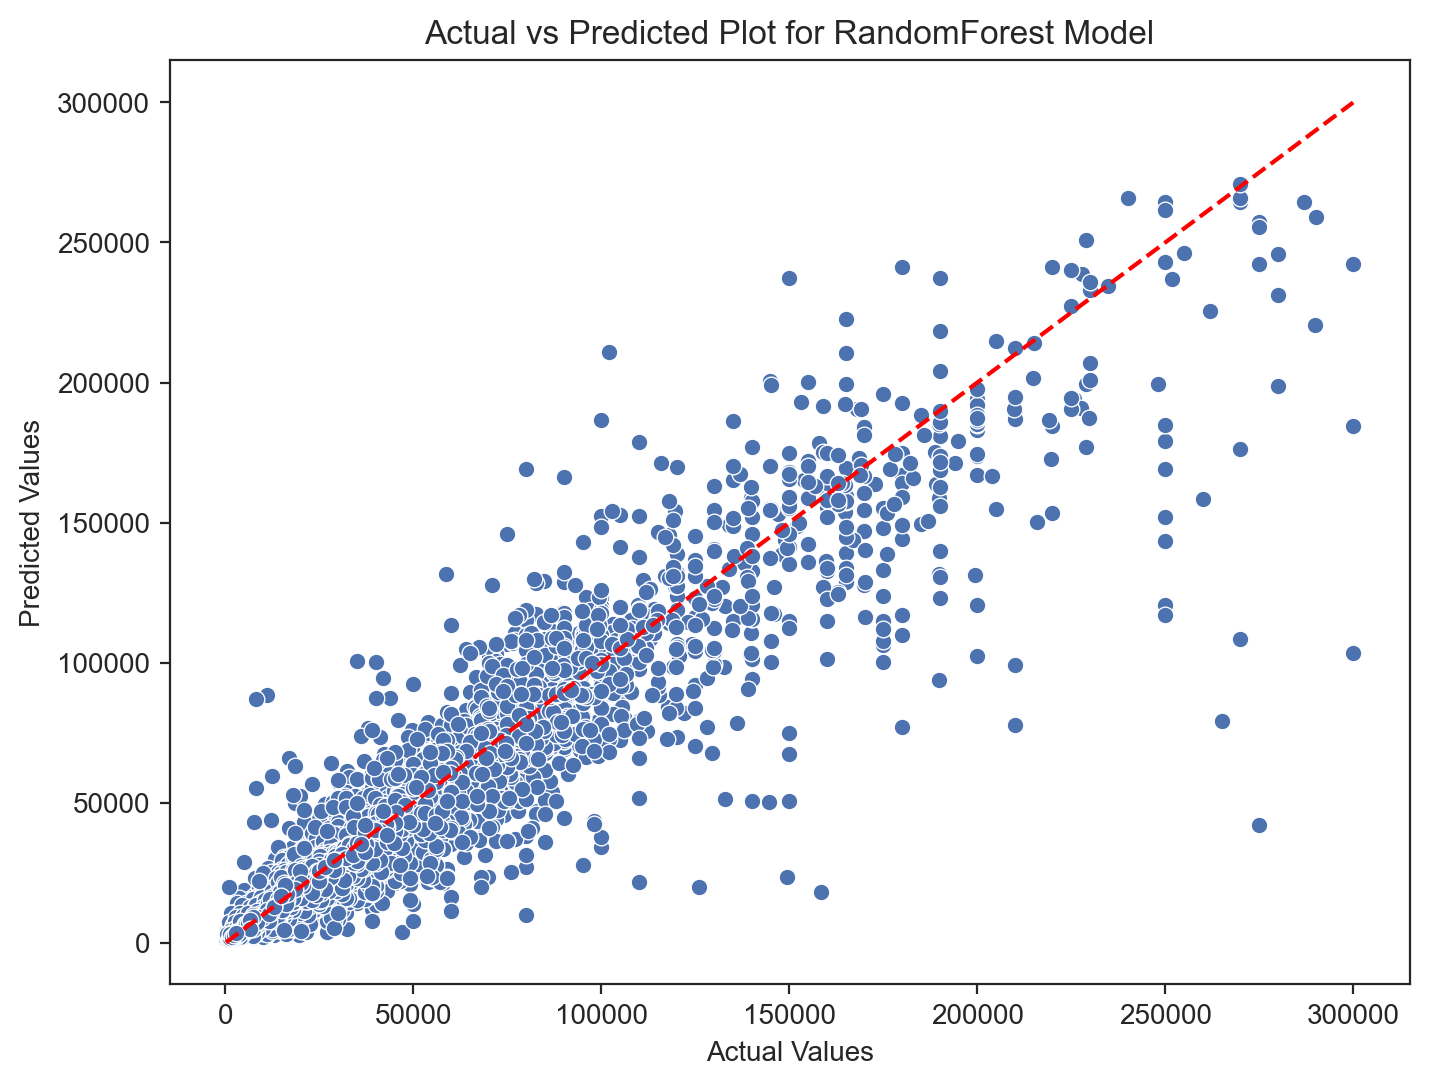

In [86]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predictions_rf)
plt.title('Actual vs Predicted Plot for RandomForest Model')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.show()


we see that model performs well for the price range upto 100000, for the higher price we see some exceptions for the prediction of dataset. Also model is neither overfitting nor underfitting to our dataset.

# Residual Plot

we will also examine the residual plot for RandomForest regression model which will help in understanding the distribution and patterns of errors.

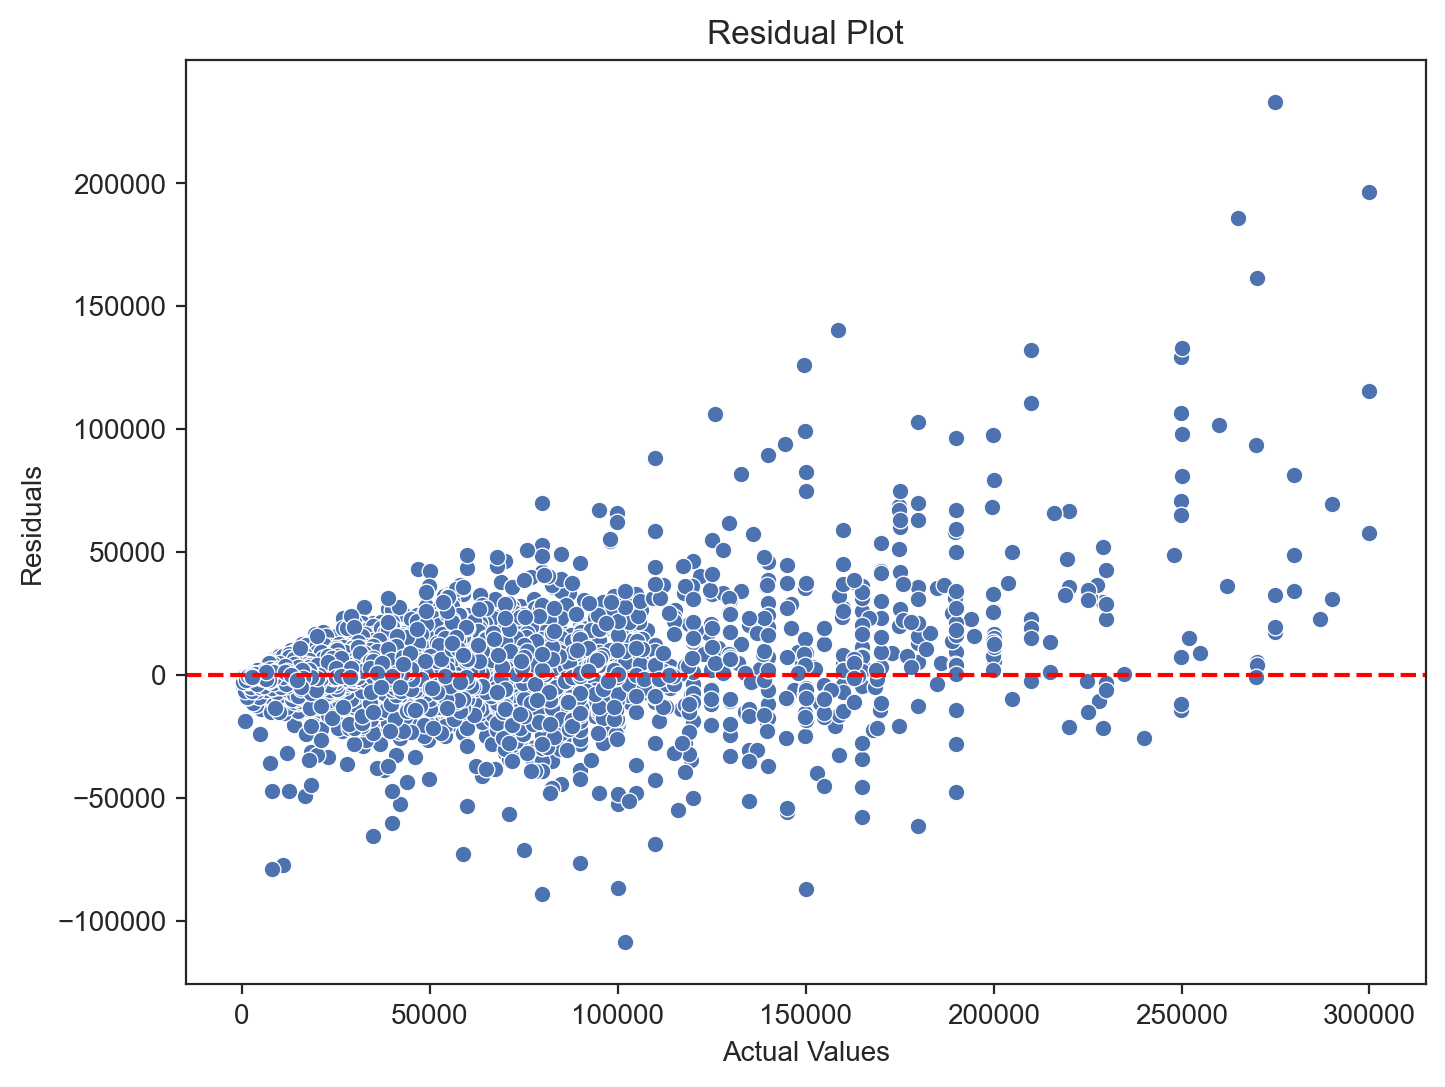

In [87]:
residuals = y_test - predictions_rf
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


we see the patteren here that for price above 100000 we have random values that not folowing the trend. Also some very low price cars also show exceptional behaviour

## Local and Global Explanation Using SHAP

In [88]:
!pip install --upgrade -q shap
import shap
shap.initjs()

DEPRECATION: Loading egg at d:\anaconda\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [89]:
rf_model = pipeline_rf.named_steps['regressor']
sample_train = 1000
sample_test = 200
X_train_sample = X_train.sample(n=sample_train, random_state=42)  # Take a random sample of X_train
y_train_sample = y_train.sample(n=sample_train, random_state=42)
X_test_sample = X_test.sample(n=sample_test, random_state=42)
y_test_sample = y_test.sample(n=sample_test, random_state=42)
X_train_encoded = preprocessor.fit_transform(X_train_sample, y_train_sample)
X_test_encoded = preprocessor.fit_transform(X_test_sample, y_test_sample)
# Initialize the SHAP explainer with the Random Forest model
explainer = shap.TreeExplainer(rf_model, X_train_encoded)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_encoded)

 99%|===================| 198/200 [00:13<00:00]        

In [103]:
# Compute SHAP values
shap_values = explainer(X_test_encoded)

 96%|=================== | 191/200 [00:13<00:00]       

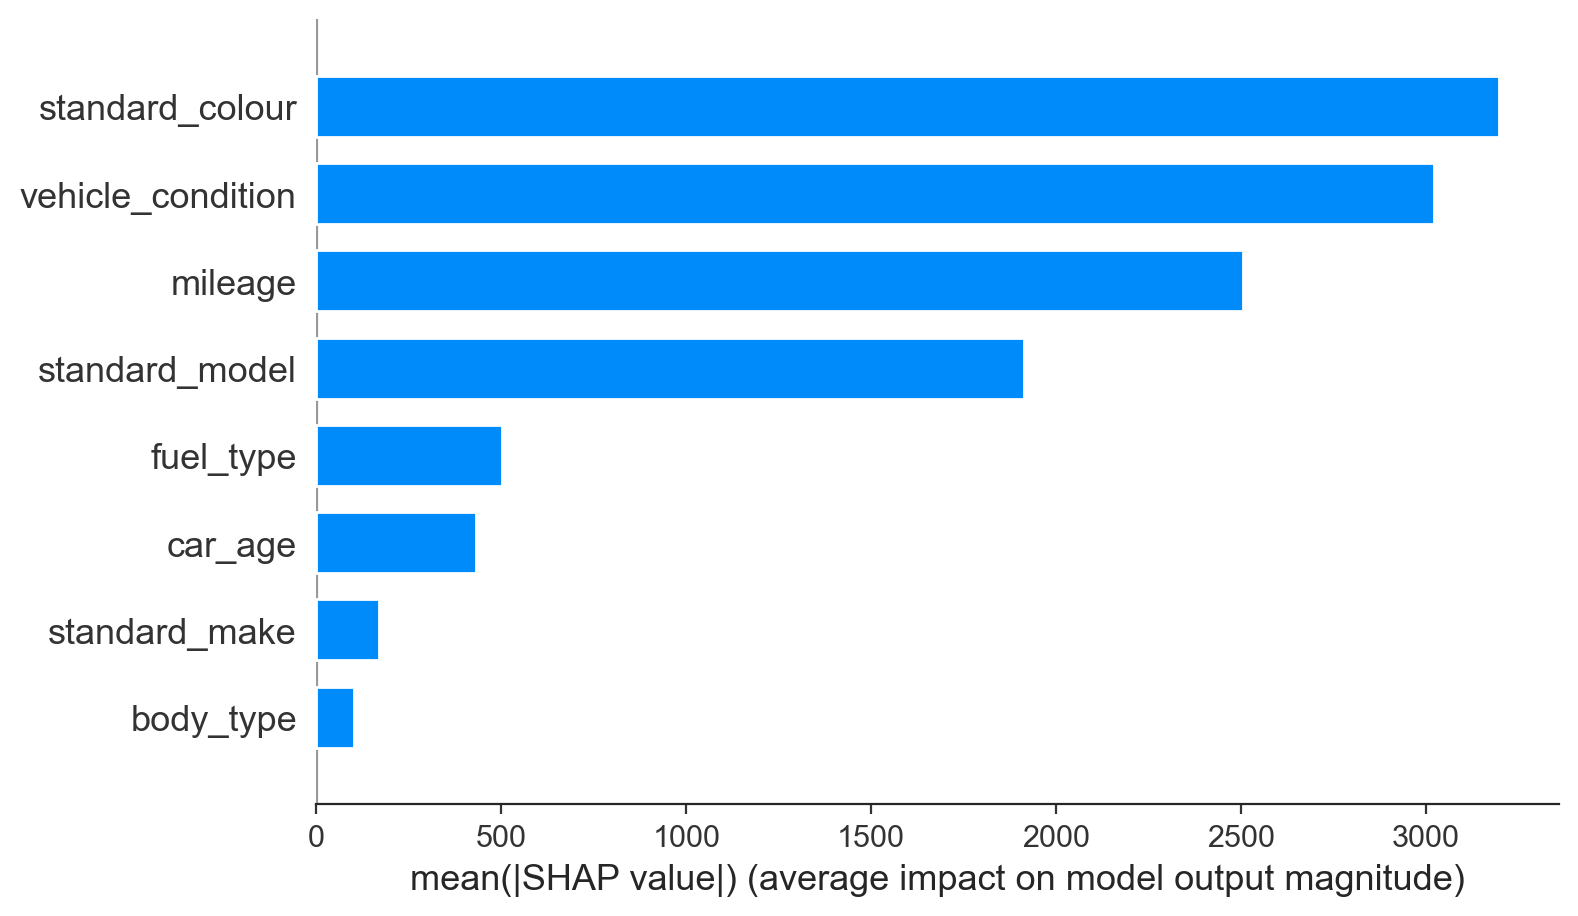

In [122]:
shap_values = explainer.shap_values(X_test_encoded)
shap.summary_plot(shap_values, X_test_sample, plot_type="bar", show=False)


In this summary plot using shap, low SHAP values suggest features that have minimal impact on predictions, while high SHAP values indicate features that strongly influence the model's predictions. These insights are valuable for understanding the importance of different features in the model's decision-making process.

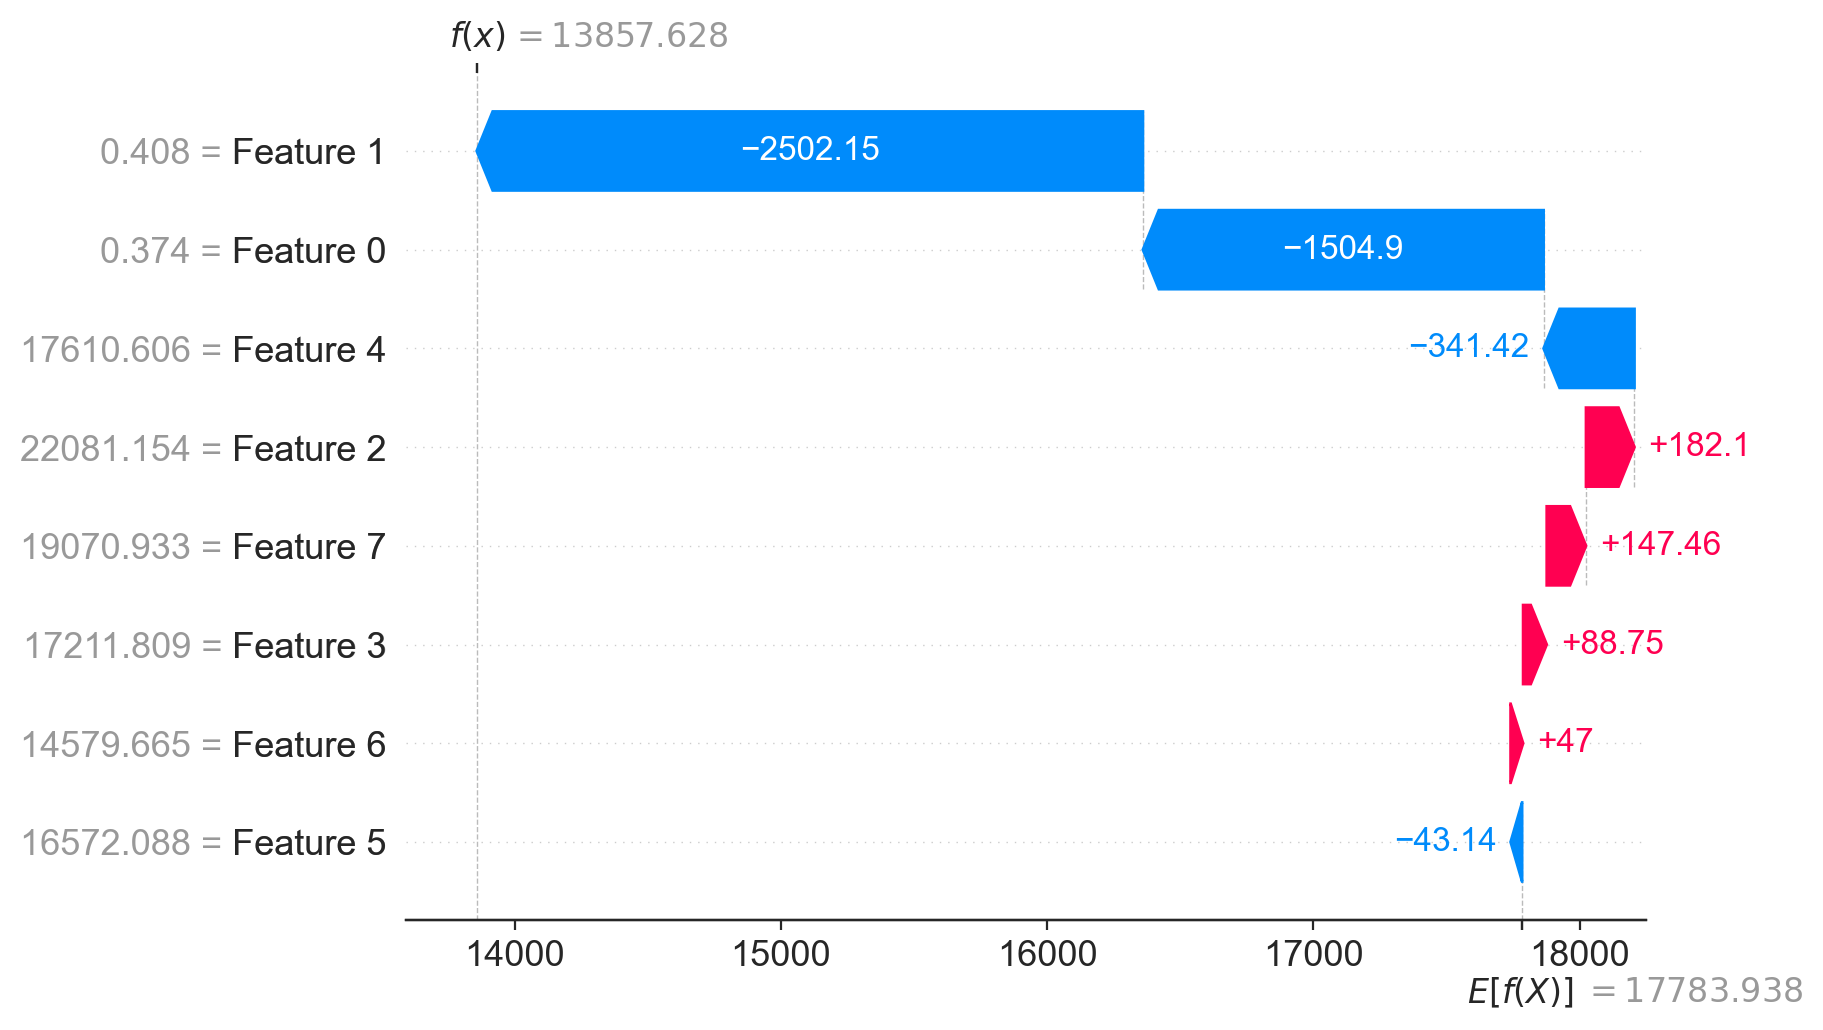

In [124]:
shap_values = explainer(X_test_encoded, check_additivity=False)
shap.plots.waterfall(shap_values[0])

 We see here the shap values for specific instance and we noticed that some features have low SHAP values for this instance, it means that the vehicle condition and colour have little impact on reducing or increasing the model's prediction for that instance.A high positive SHAP value suggests that the feature contributes to increasing the model's prediction, while a high negative SHAP value indicates that the feature contributes to decreasing the model's prediction.

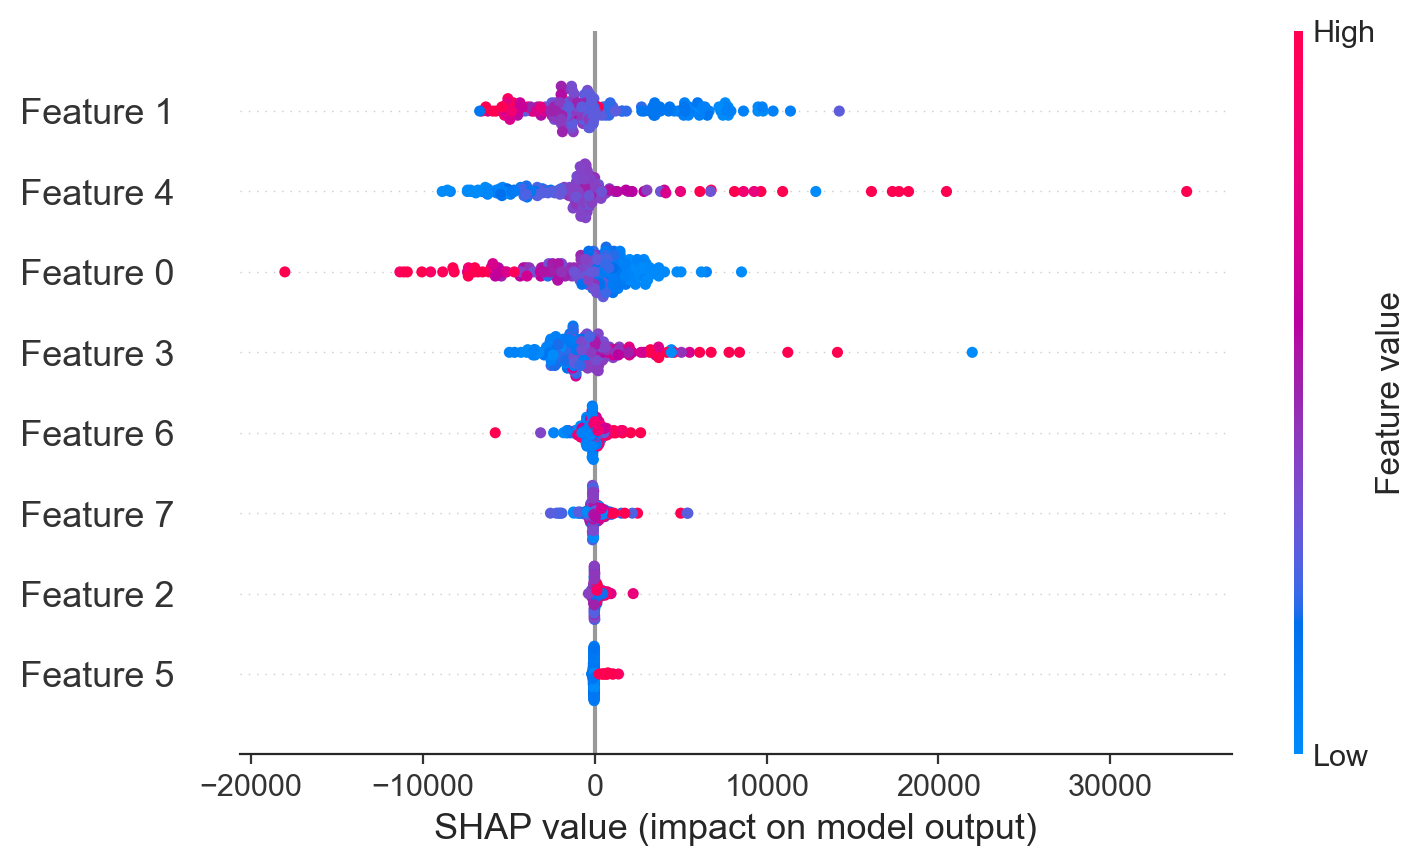

In [101]:
# global model
shap.plots.beeswarm(shap_values)

Overall, we plot the beeswarm which provides insights into which features have the most influence on the model's output across the entire dataset. Features like Standard make and car age and mileage wider distributions and have a greater impact on the model's predictions. Whereas other features such as Fuel type, body type and vehicle condition have less distribution of shap values.


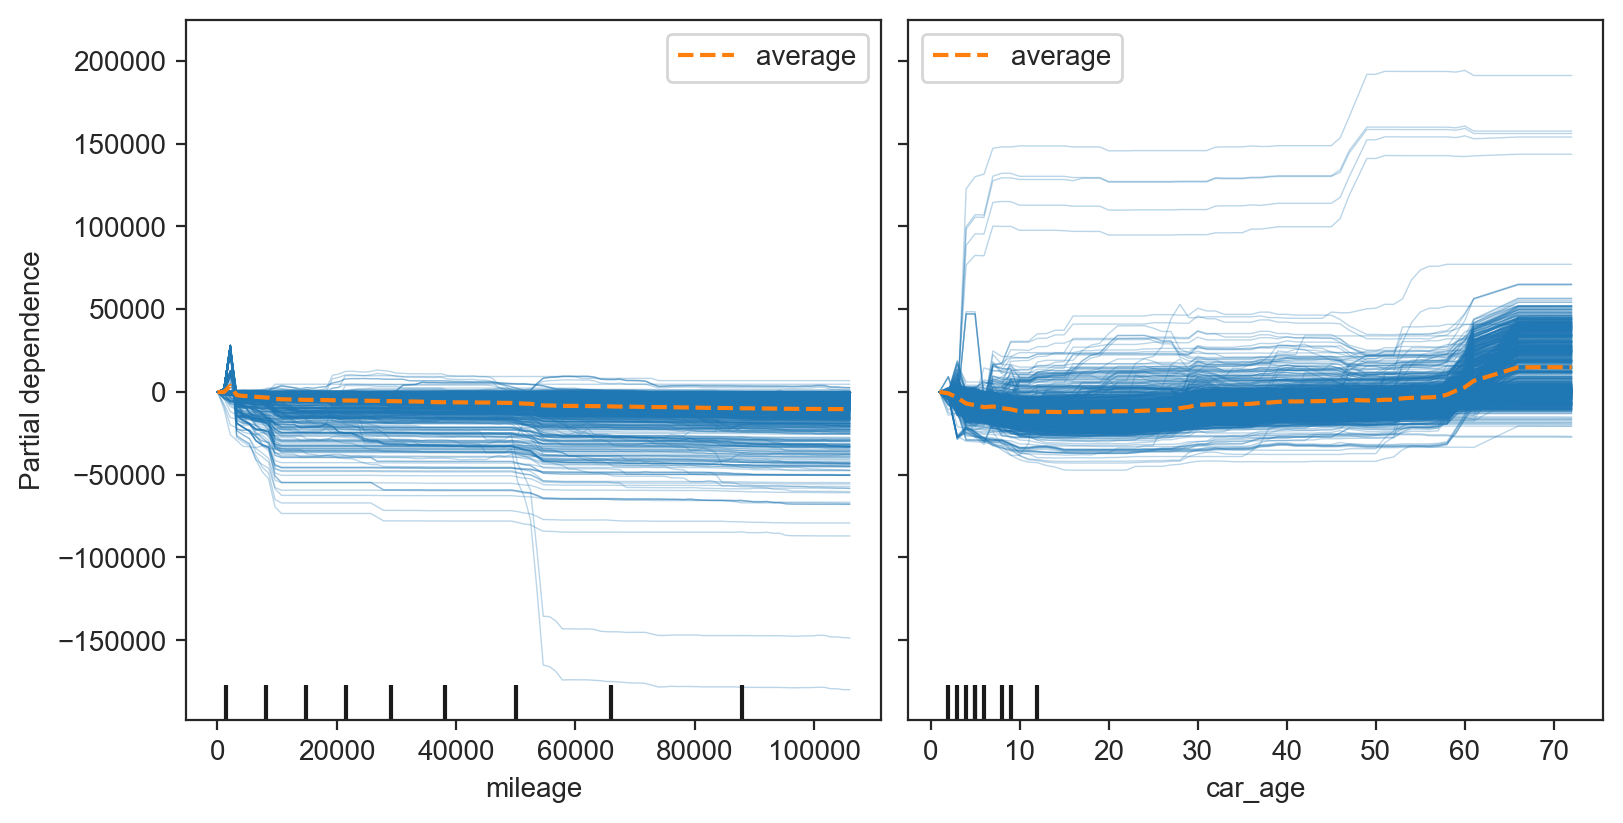

In [109]:
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
fig, ax = plt.subplots(figsize=(8,4), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    pipeline_rf, X_test, features=['mileage', 'car_age'],
    kind='both', ax=ax, n_cols=2, centered=True
);

These Partial Dependency plots for mileage and car age shows that with the increase in mileage, the prediction for target variable decreases and also it shows the uncertainty associated with the mileage. The PD plot for car age shows that with increase of car age the model's predicted outcome decreases and for really high age it increases again. This behaviour for the two numerical features depicts that very slight contribution to model's predictions. 

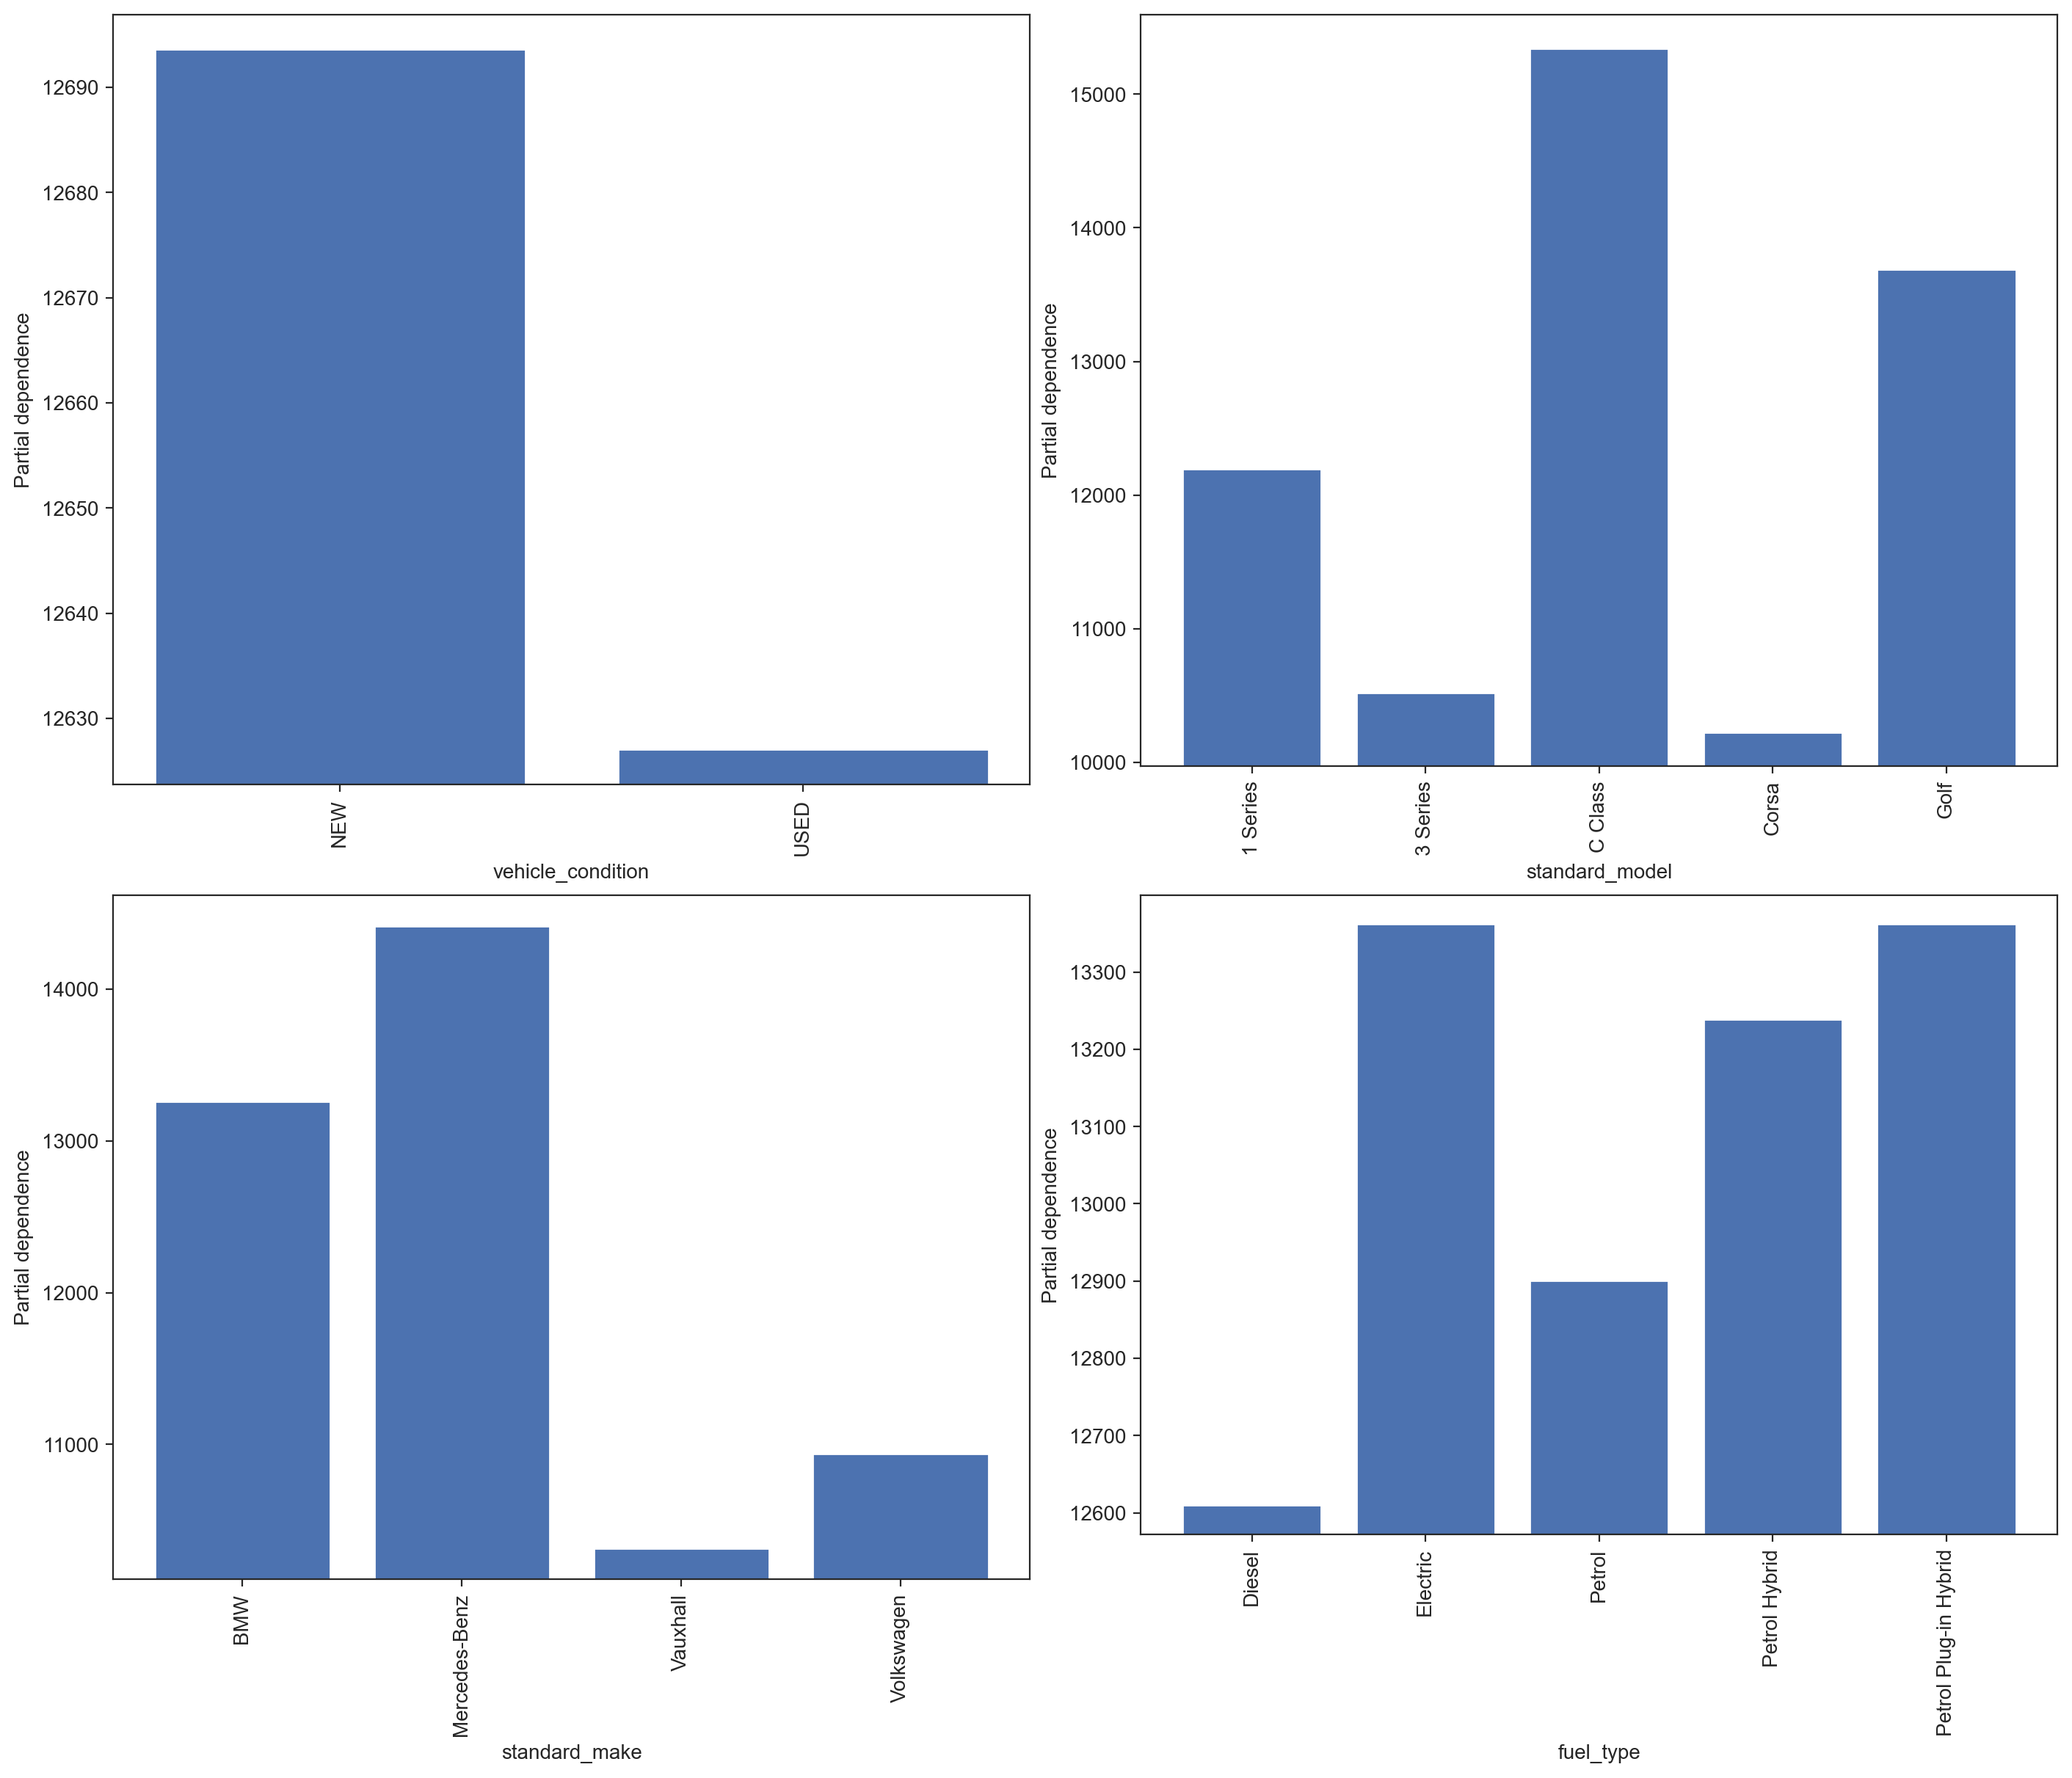

In [118]:
# Get the top 5 categories for each feature
top_standard_models = caml['standard_model'].value_counts().head(5).index.tolist()
top_standard_makes = caml['standard_make'].value_counts().head(5).index.tolist()
top_fuel_types = caml['fuel_type'].value_counts().head(5).index.tolist()

# Filter the test data based on the top categories
filtered_X_test = X_test[X_test['standard_model'].isin(top_standard_models) &
                        X_test['standard_make'].isin(top_standard_makes) &
                        X_test['fuel_type'].isin(top_fuel_types)]

# Plot partial dependence
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12), constrained_layout=True)
for i, feature in enumerate(['vehicle_condition', 'standard_model', 'standard_make', 'fuel_type']):
    row = i // 2
    col = i % 2
    PartialDependenceDisplay.from_estimator(
        pipeline_rf, filtered_X_test, features=[feature],
        categorical_features=[feature],
        kind='average', ax=axes[row, col]
    )

Now we plot the PD plots for the categorical features but with top entries for standard model, fuel type, vehicle condition and standard make. Partial dependence for new cars is more than used cars and Mercedes-Benz is the standard make which is taking more part in making predictions than other standard makers. Similarly Electric and petrol plud in hybrid fuel types are effecting predictions more than the other types.

In this project, we looked at the problem of predicting car sales based on certain features of the vehicle. The data comprising 402005 rows of 11 features and 1 target (car prices). Duplicates were dropped, and the resulting dataset was cleaned and processed, leading to a final dataset with 392978 rows and 9 columns. 

we employed automated feature selection techniques including Recursive Feature Elimination (RFE) and SelectKBest to identify the most influential features for predicting our target variable( both methods generated almost similar features). We then apply PCA for dimensionality reduction with linear regression model and evaluate it.

We then trained three models: Linear Regression, Random Forest, and HistGradient Boosting, and evaluated their performance. Random Forest emerged as the best performer, exhibiting superior predictive capabilities,  having the lowest root mean squared error (RMSE) of £4776, and an R2 score of 92.7%. We further enhanced our analysis by implementing an Averaging Voting Ensemble method, which combines predictions from multiple models (Linear Regression, Random Forest, and HistGradient Boosting) to produce a more robust and reliable prediction. To gain deeper insights into its behavior, we leveraged SHAP (SHapley Additive exPlanations) values to interpret feature importance. Additionally, we visualized the impact of key features on model predictions using partial dependence plots, providing actionable insights for further analysis and decision-making.

five features were identified as most influential in predicting the price of a car as follows
Vehicle Condition 
mileage
Standard Make
Standard Model
Fuel Type
based on the gven dataset. This isn't to say these are the only important features that determine the price of the vehicle. The more features (and rows) we have in the dataset, the more acturate the the model is. 